# Section one - Data Analysis and Comprehension

# 0. Imports 

In [1]:
import warnings
import pandas                  as pd
import seaborn                 as sns
import statsmodels.api         as sm
import statsmodels.formula.api as smf

from matplotlib                import pyplot as plt
from IPython.core.display      import HTML
  
from sklearn.model_selection   import train_test_split, KFold, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing     import LabelEncoder, PolynomialFeatures
from sklearn.ensemble          import RandomForestRegressor
from sklearn                   import linear_model
from sklearn                   import metrics
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_regression, RFE, RFECV
from sklearn.svm               import SVR



warnings.filterwarnings('ignore') 

# 0.1. Helper Functions

In [7]:
# --- Jupyter Notebook Settings
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25,12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>' ) )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()

In [8]:
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


# 0.2. Loading Data

In [6]:
df_raw = pd.read_csv('C:/Users/Cidones/Desktop/house_rocket_project/kc_house_data.csv')

    1. Identify peek at your data
    2. Dimensions of your data
    3. Data Type for each attribute
    4. Descriptive Statistics
       4.1 Central tendency
            4.1.1 Mean, Median, Mode
       4.2 Dispersion

# 1.0. Data Preparation


## 1.1 Rename Attributes


In [5]:
df1 = df_raw.copy()
df1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [62]:
#new columns name
#new_cols = ['id', 'date', 'price', 'bedrooms', 'bathrooms', 'area_living', 'area_lot', 'floors' 'waterfront', 'house_view', 'house_condition', 'house_grade', 'area_above', 'area_basement', 'year_built', 'year_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
#rename 
#df1.columns = new_cols 
# ERROR

## 1.2. Format of Attributes

In [9]:
df1.dtypes


id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [10]:
df1['bathrooms'] = np.round(df1['bathrooms'], 1)

#convert date from string to datetime64
df1['date'] = pd.to_datetime( df1['date'])

df1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.2,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.0,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.0,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.0,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [11]:
df1.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

# 2.0. Describe Data

In [13]:
 df2 = df1.copy()

## 2.1. Data Dimensions

In [14]:
print( 'Number of Rows: {}'.format( df2.shape[0] ) )
print( 'Number of Columns: {}'.format ( df2.shape[1] ) )

Number of Rows: 21613
Number of Columns: 21


## 2.2. Data Type Attributes


In [15]:
print(df2.dtypes)

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object


## 2.3. Number of NA

In [16]:
df2.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null datetime64[ns]
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(15)
memory usage: 3.5 MB


In [18]:
#Drop id and date columns 
df2 = df2.drop(['id', 'date'], axis=1)

## 2.4. Descriptive Statistics

In [19]:
#separate the categorical from numerical features
num_attributes  = df2.select_dtypes( include = ['int64', 'float64', 'datetime64'] )
cat_attributes = df2.select_dtypes( exclude = ['int64', 'float64', 'datetime64'] )

print( 'Num of Categorical : {}'.format( cat_attributes.shape[1]) )
print( 'Num of Numerical: {}'.format( num_attributes.shape[1] ) )

Num of Categorical : 0
Num of Numerical: 19


## 2.4.1 Central Tendency and Dispersion


###### 2.4.1.1. Numerical Attributes


In [20]:
#Measure of Central Tendency
ct1 = pd.DataFrame( num_attributes.apply( mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( median ) ).T
ct3 = pd.DataFrame( num_attributes.apply( lambda x: x.mode() ) )

# Dispersion
d1 = pd.DataFrame( num_attributes.apply( std ) ).T
d2 = pd.DataFrame( num_attributes.apply( min ) ).T
d3 = pd.DataFrame( num_attributes.apply( max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T


m = pd.concat( [ct1, ct2, ct3, d1, d2, d3, d4, d5, d6] ).T.reset_index()
print(m)
m.columns = ['attributes', 'mean', 'median', 'mode', 'standard_deviation', 'min', 'max', 'range', 'kurtosis', 'skew']


            index           0        0        0        1        2        3          0        0            0            0                                                  0         0
0           price      540088   450000   350000   450000      NaN      NaN     367119    75000      7.7e+06    7.625e+06  <bound method Series.kurt of 0        7.822126...   4.02407
1        bedrooms     3.37084        3        3      NaN      NaN      NaN    0.93004        0           33           33  <bound method Series.kurt of 0        7.822126...    1.9743
2       bathrooms     2.11881      2.2      2.5      NaN      NaN      NaN   0.766858        0            8            8  <bound method Series.kurt of 0        7.822126...  0.508751
3     sqft_living      2079.9     1910     1300      NaN      NaN      NaN     918.42      290        13540        13250  <bound method Series.kurt of 0        7.822126...   1.47156
4        sqft_lot       15107     7618     5000      NaN      NaN      NaN    41419.6     

ValueError: Length mismatch: Expected axis has 13 elements, new values have 10 elements

In [ ]:
num_attributes.describe().T

# EDA - Exploration Data Analysis

## 3.1. Univariate Analysis

In [22]:
df3 = df2.copy()

## 3.1.1. Response Variable

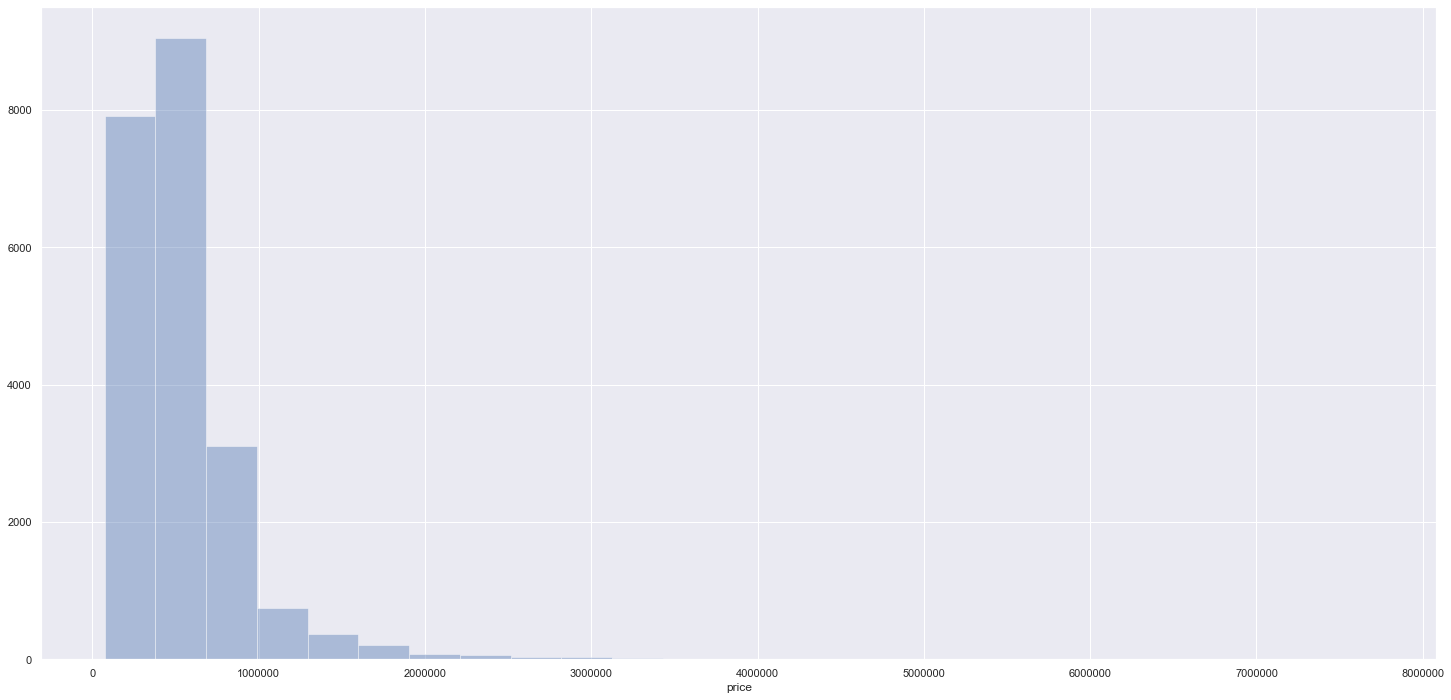

In [23]:
sns.distplot( df3['price'], kde=False, bins=25 );

## 3.1.2. Numerical Predictors

### 3.1.2.1. bedrooms

In [24]:
df3['bedrooms'].mode()

0    3
dtype: int64

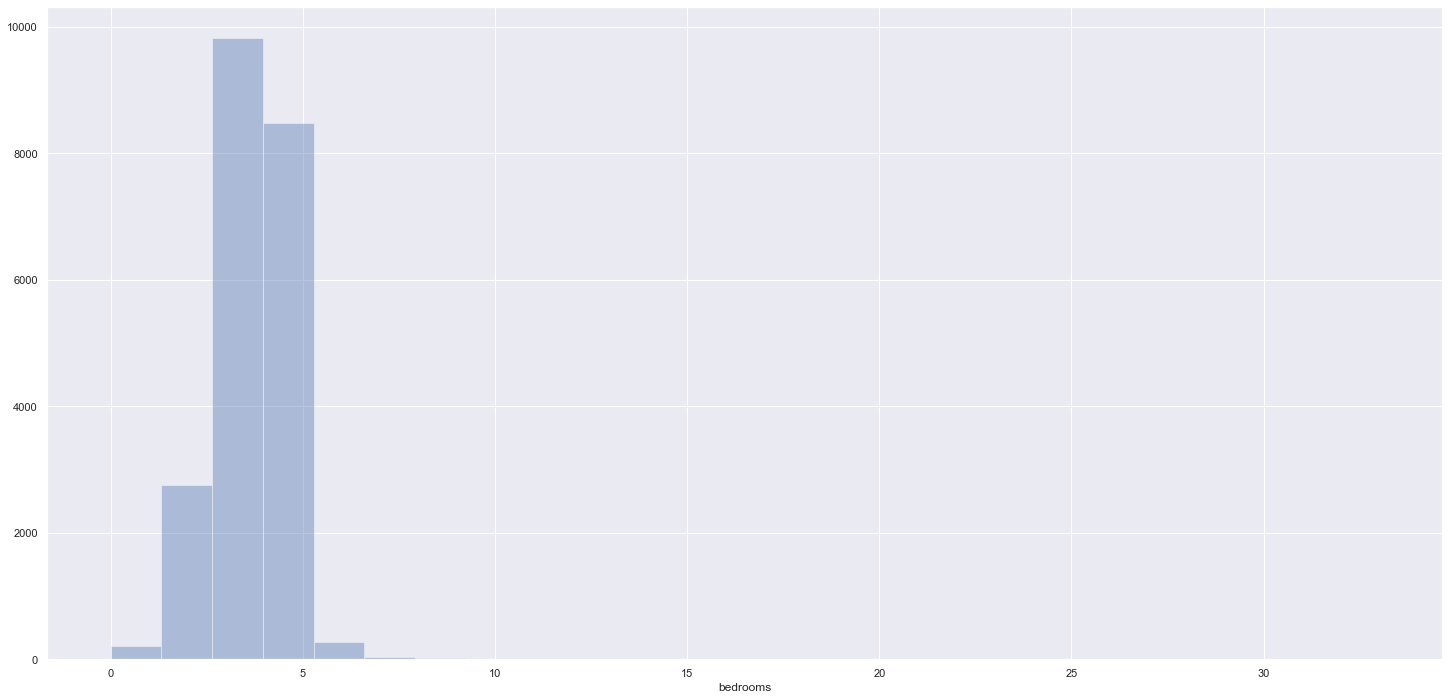

In [72]:
sns.distplot( df3['bedrooms'], kde=False, bins=25 );

### 3.1.2.1. bathrooms

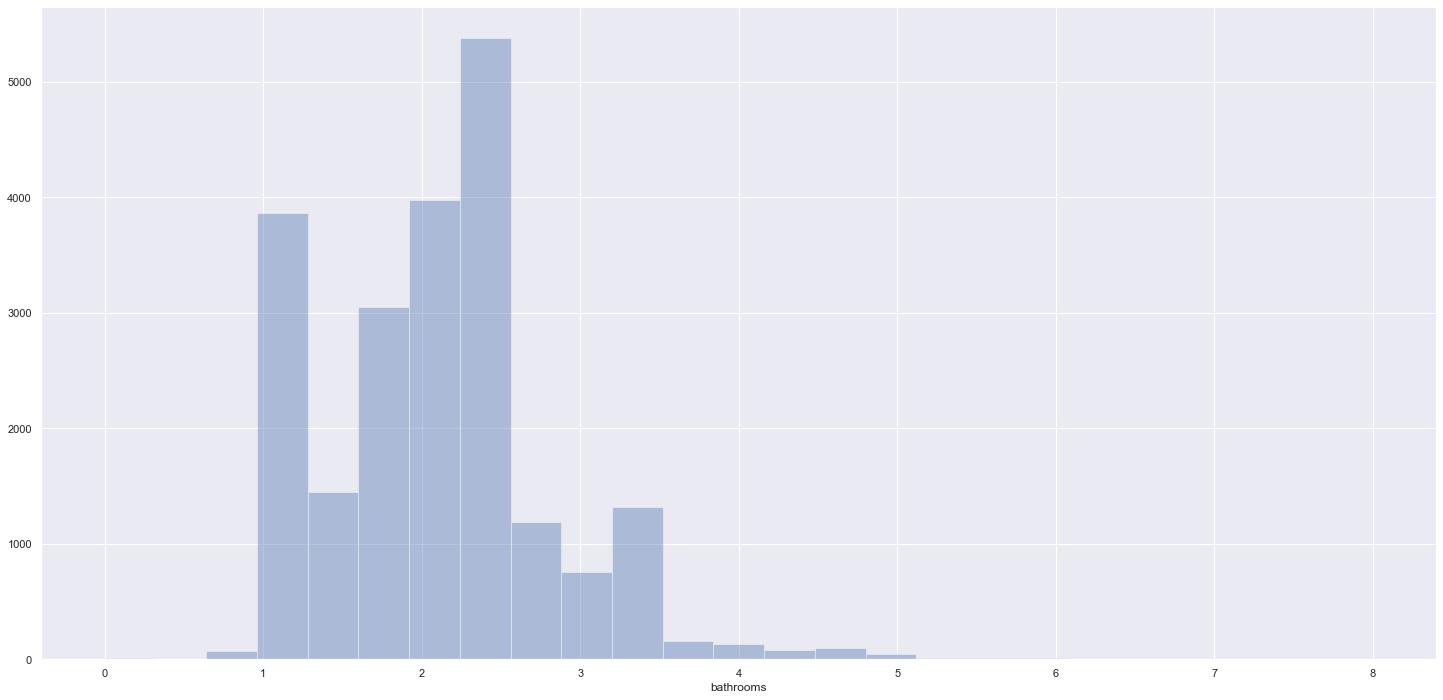

In [21]:
sns.distplot( df3['bathrooms'], kde=False, bins=25 );

### 3.1.2.1. sqft_living

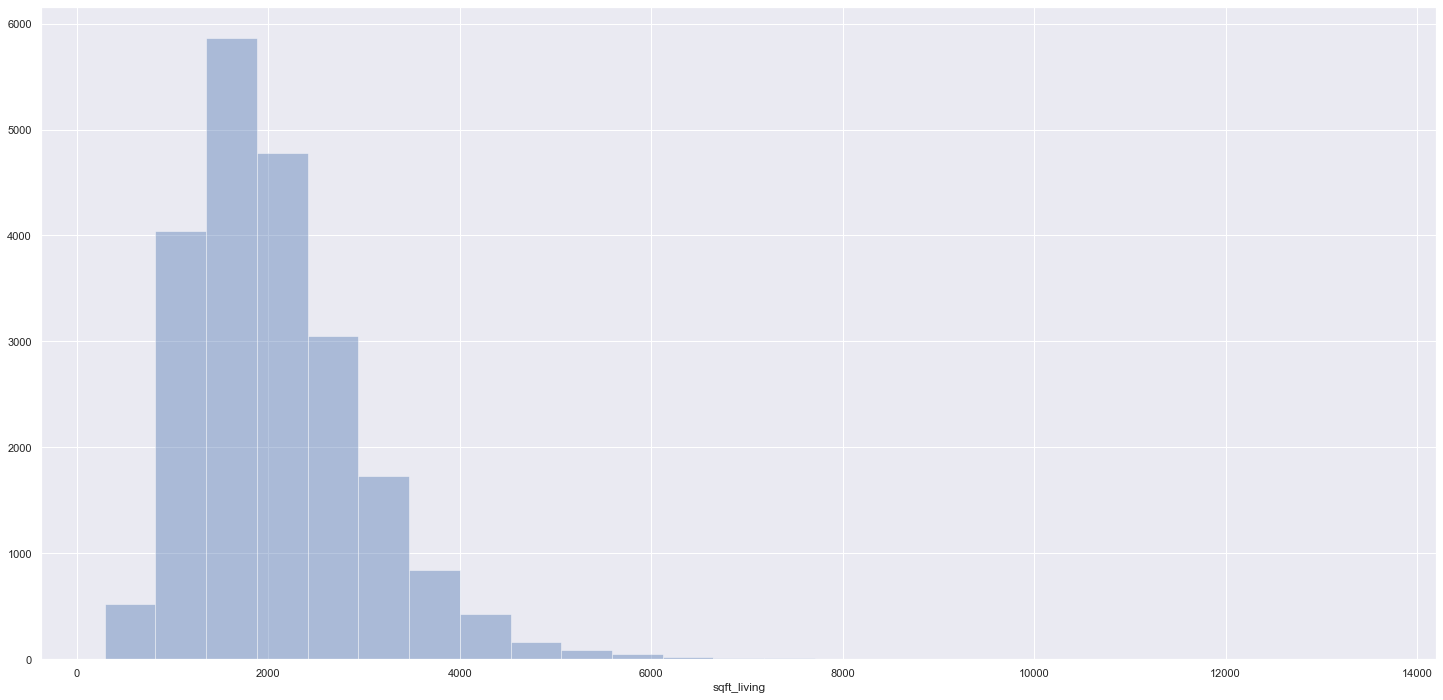

In [22]:
sns.distplot( df3['sqft_living'], kde=False, bins=25 );

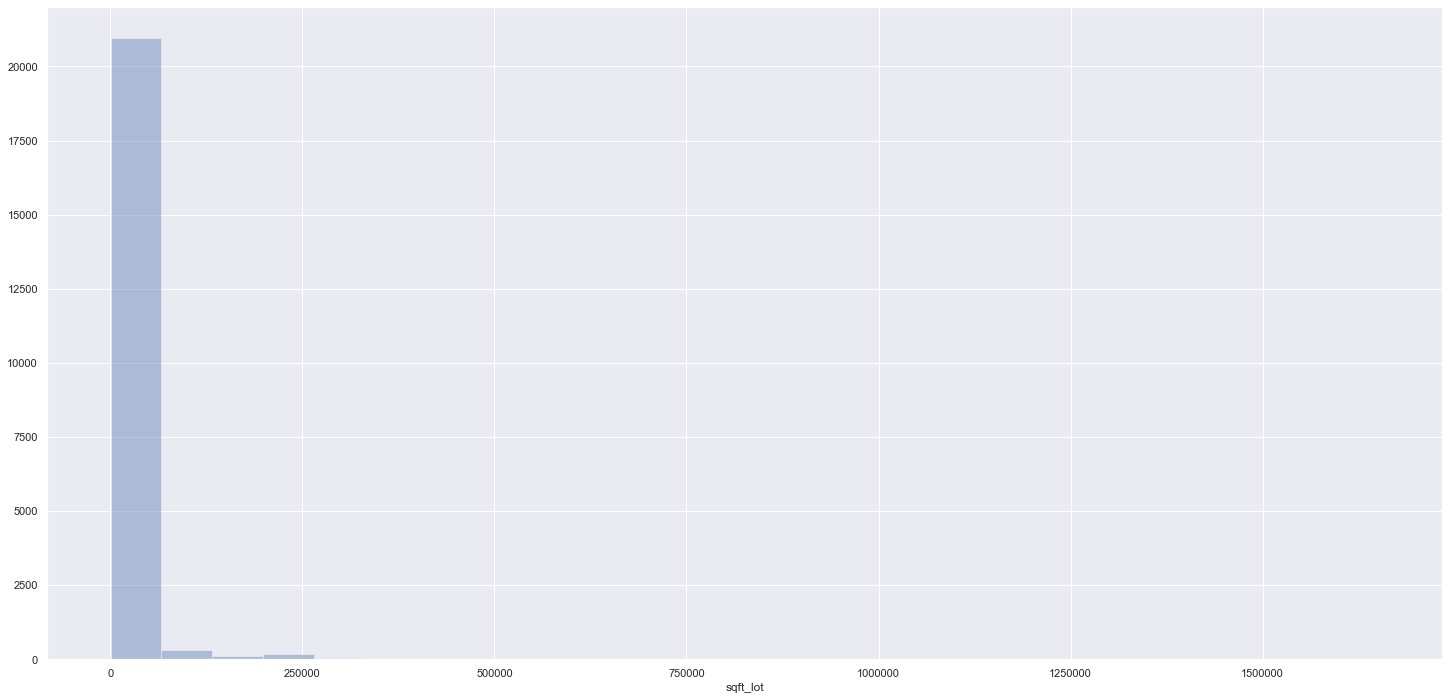

In [69]:
sns.distplot( df3['sqft_lot'], kde=False, bins=25 );

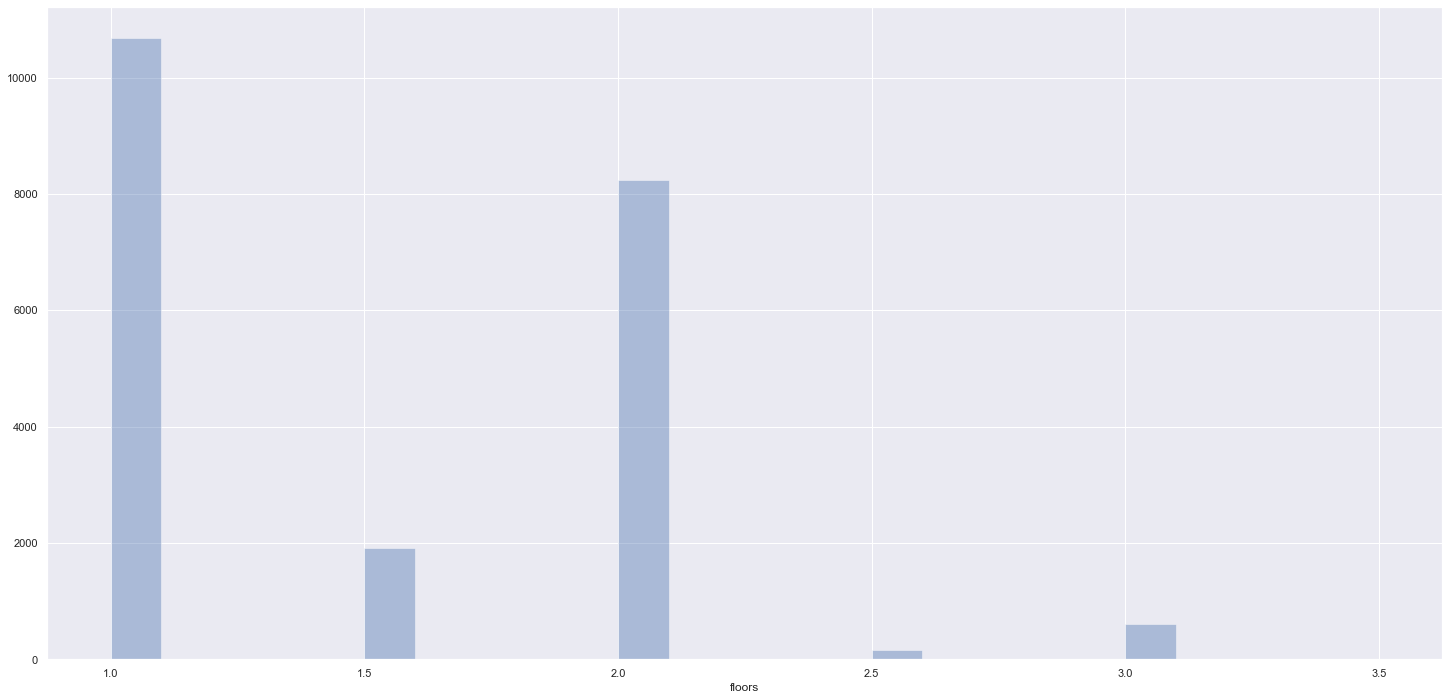

In [68]:
sns.distplot( df3['floors'], kde=False, bins=25 );

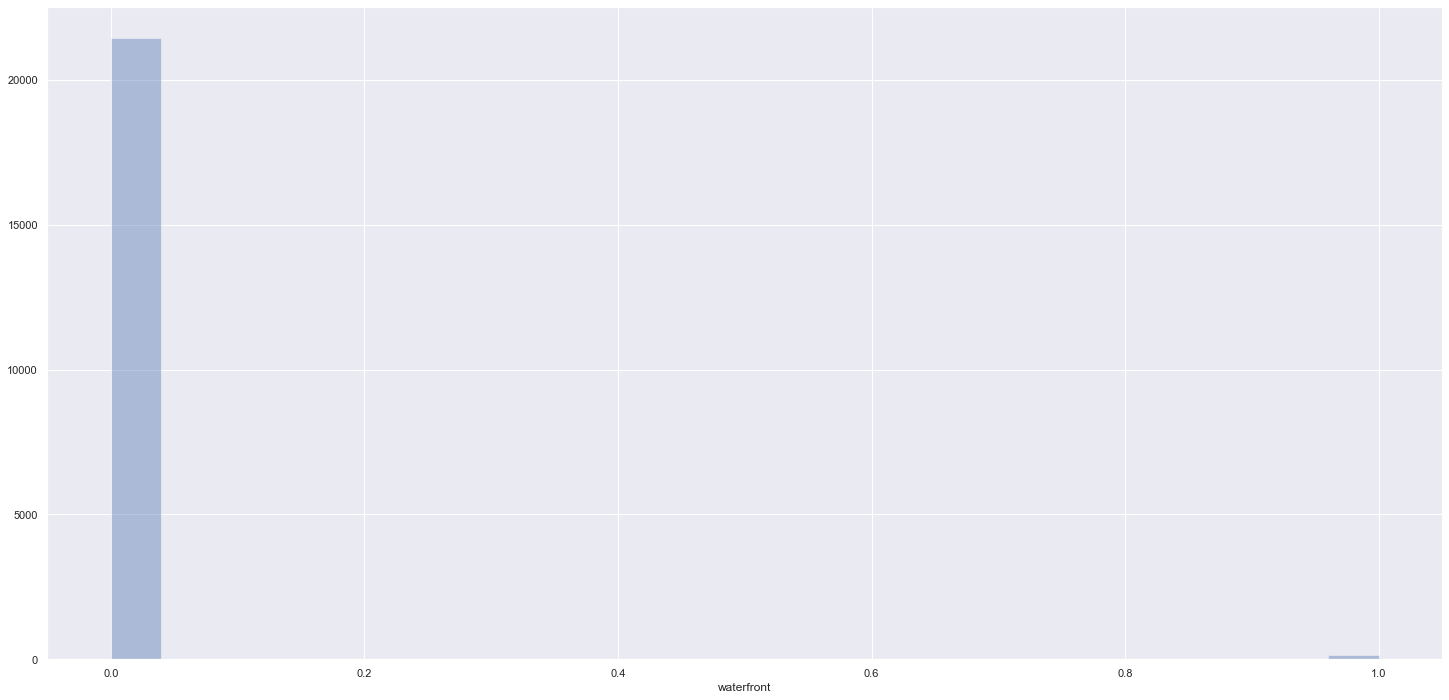

In [23]:
sns.distplot( df3['waterfront'], kde=False, bins=25 );

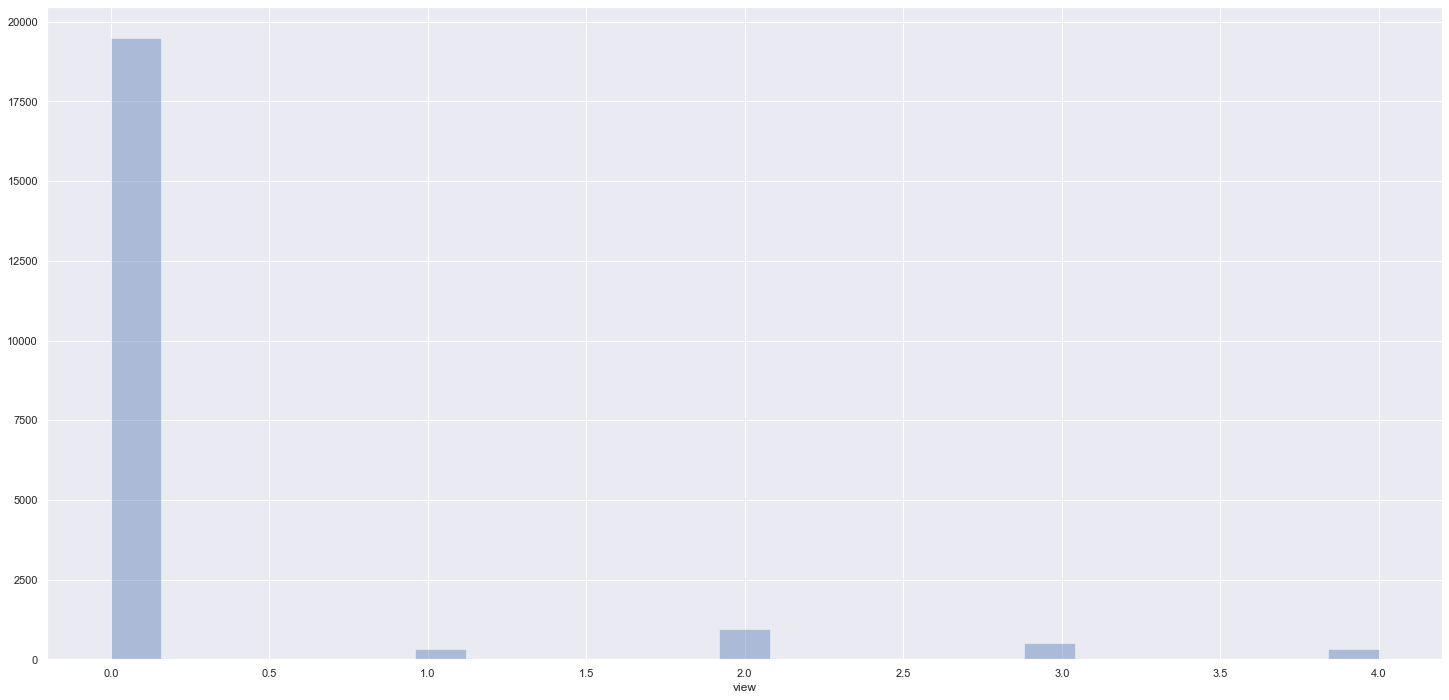

In [24]:
sns.distplot( df3['view'], kde=False, bins=25 );

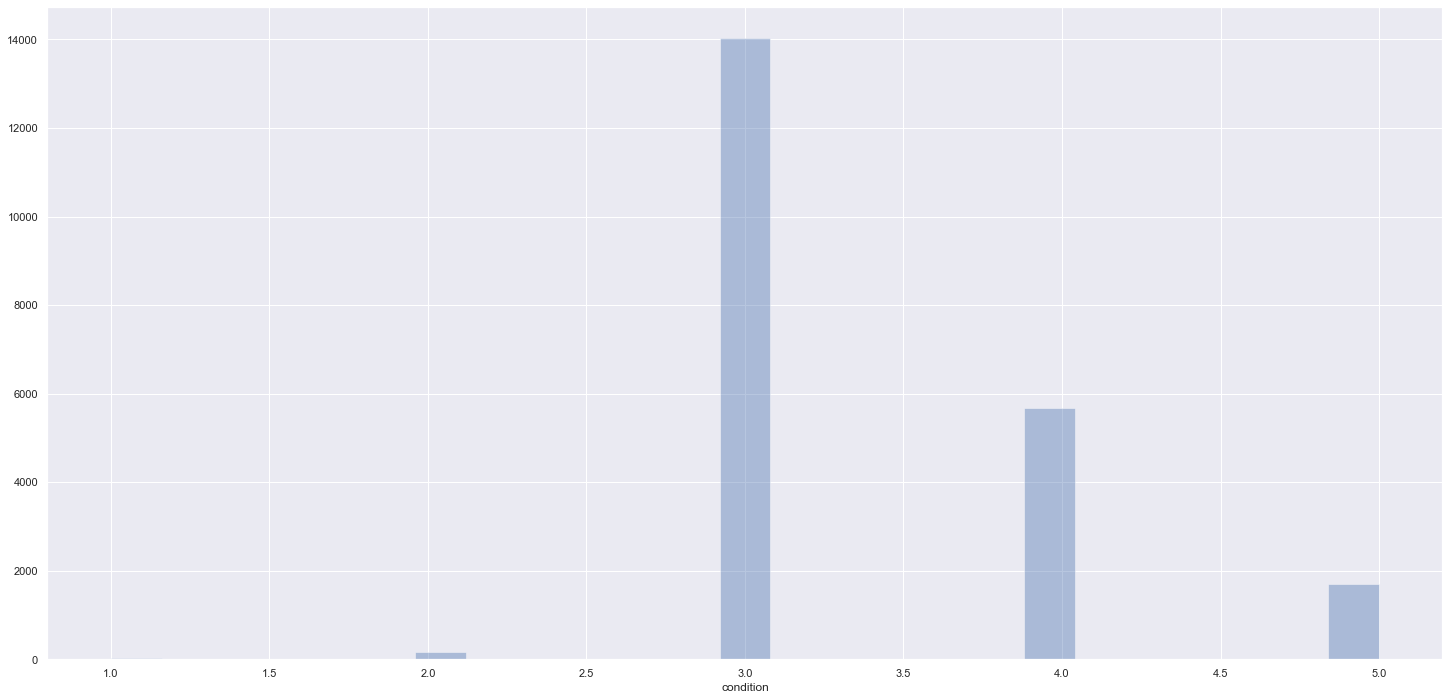

In [65]:
sns.distplot( df3['condition'], kde=False, bins=25 );

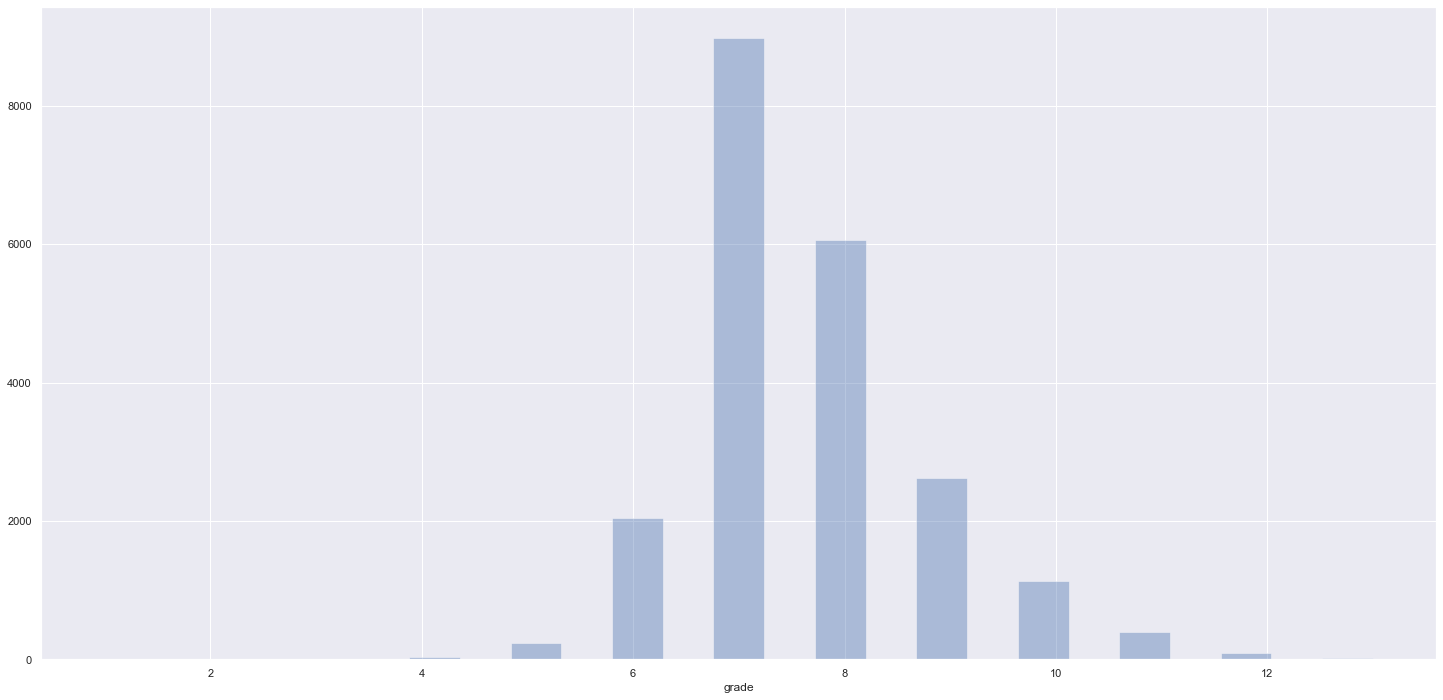

In [25]:
sns.distplot( df3['grade'], kde=False, bins=25 );

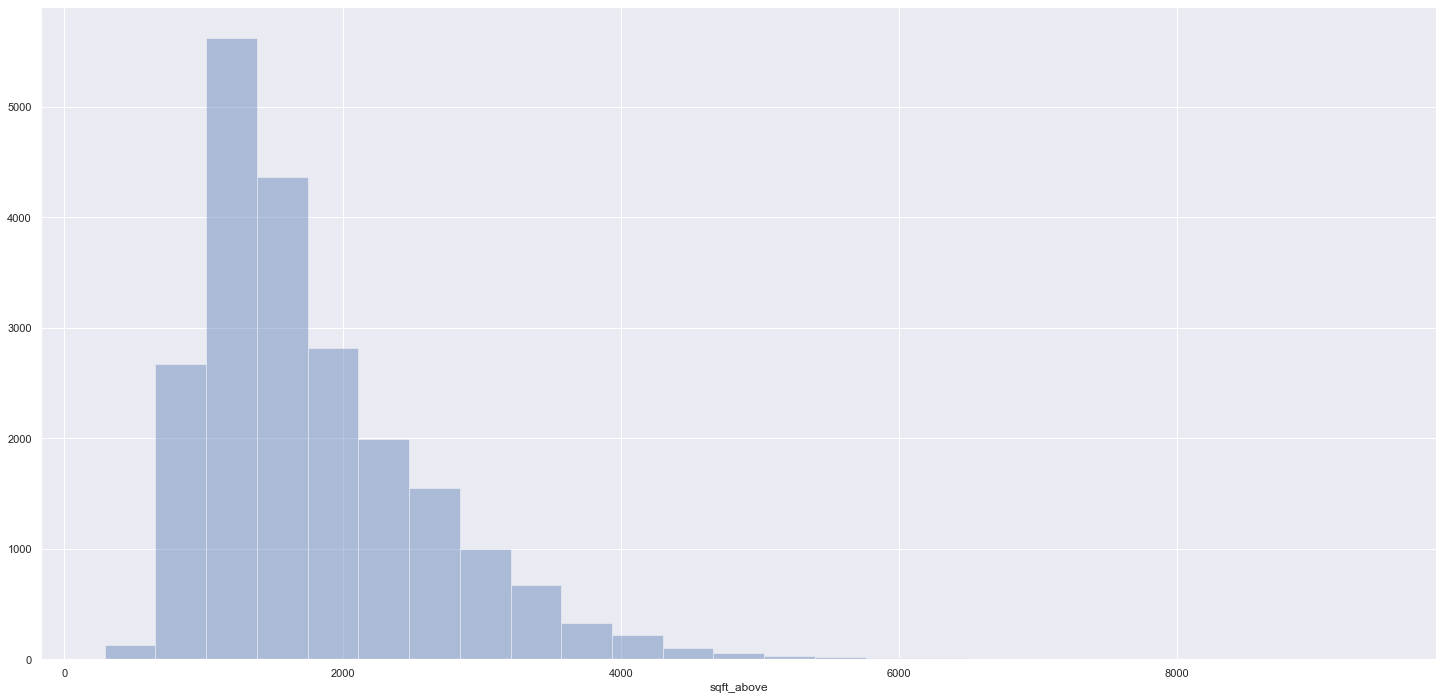

In [62]:
sns.distplot( df3['sqft_above'], kde=False, bins=25 );

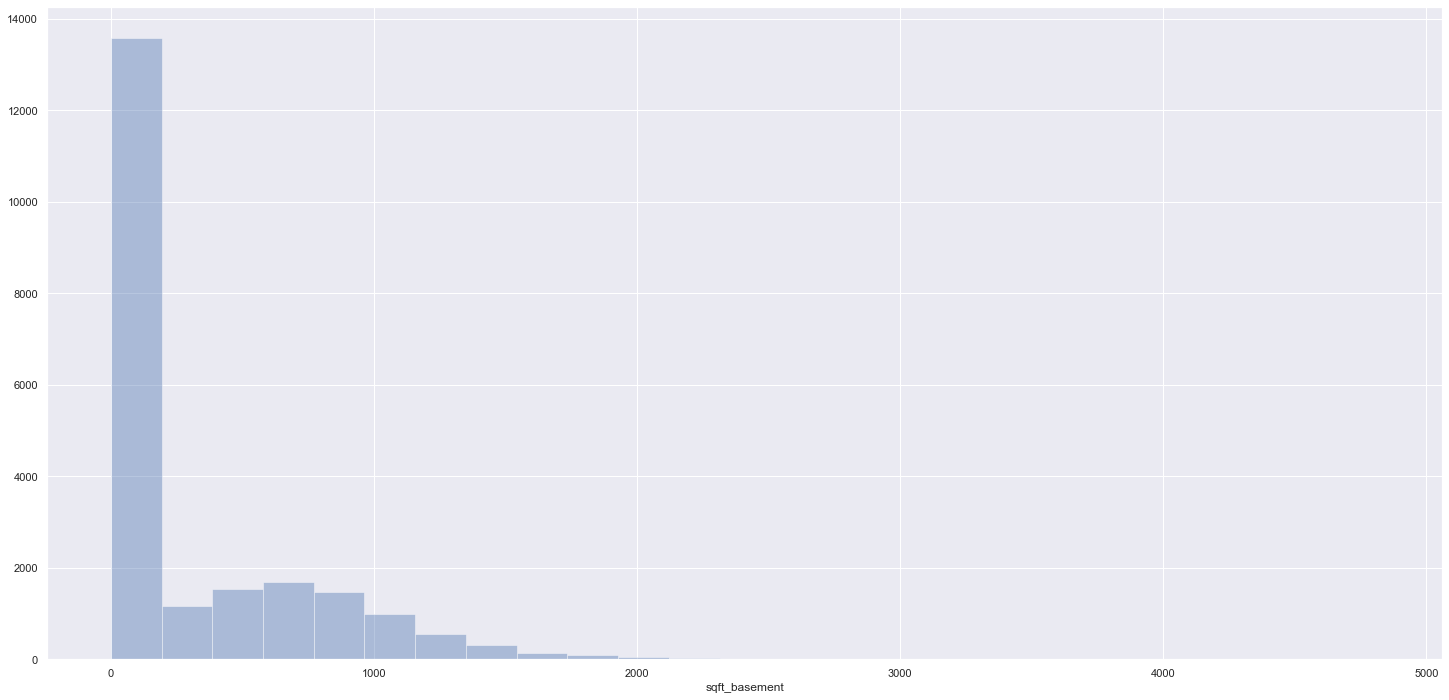

In [26]:
sns.distplot( df3['sqft_basement'], kde=False, bins=25 );

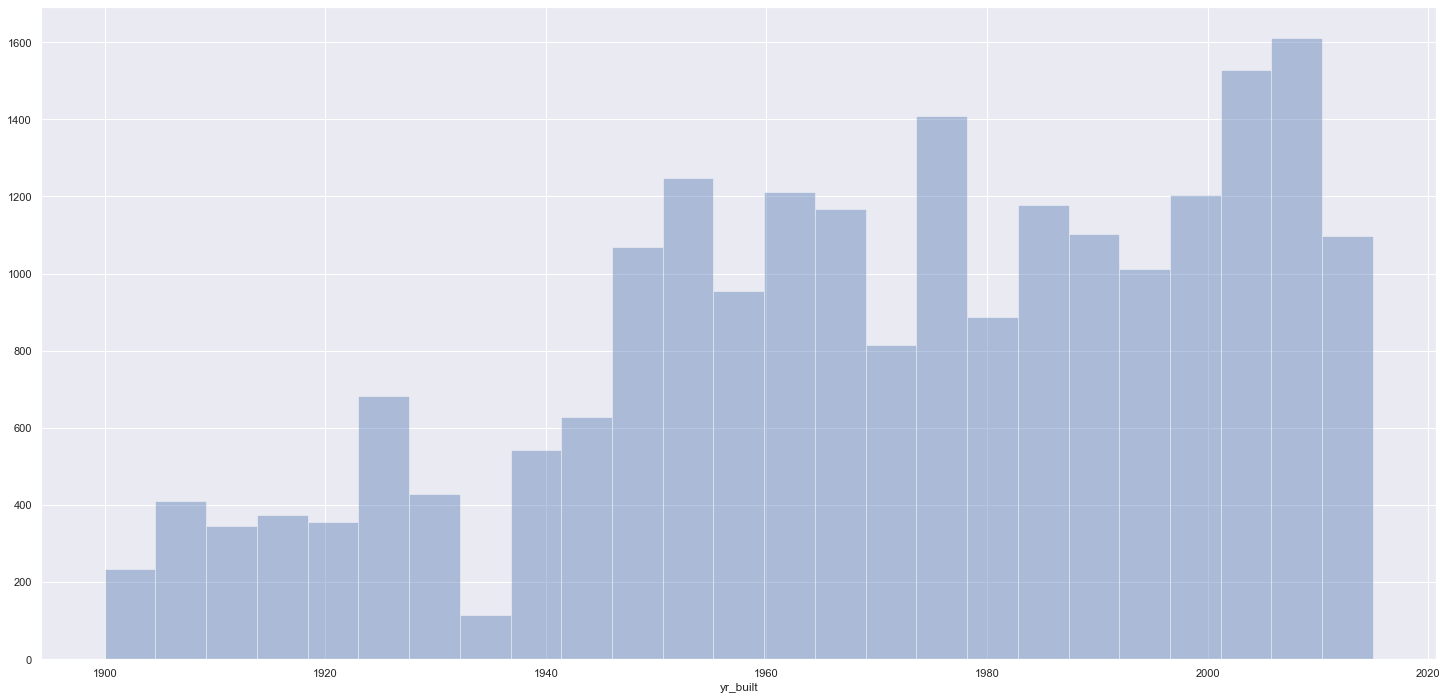

In [27]:
sns.distplot( df3['yr_built'], kde=False, bins=25 );

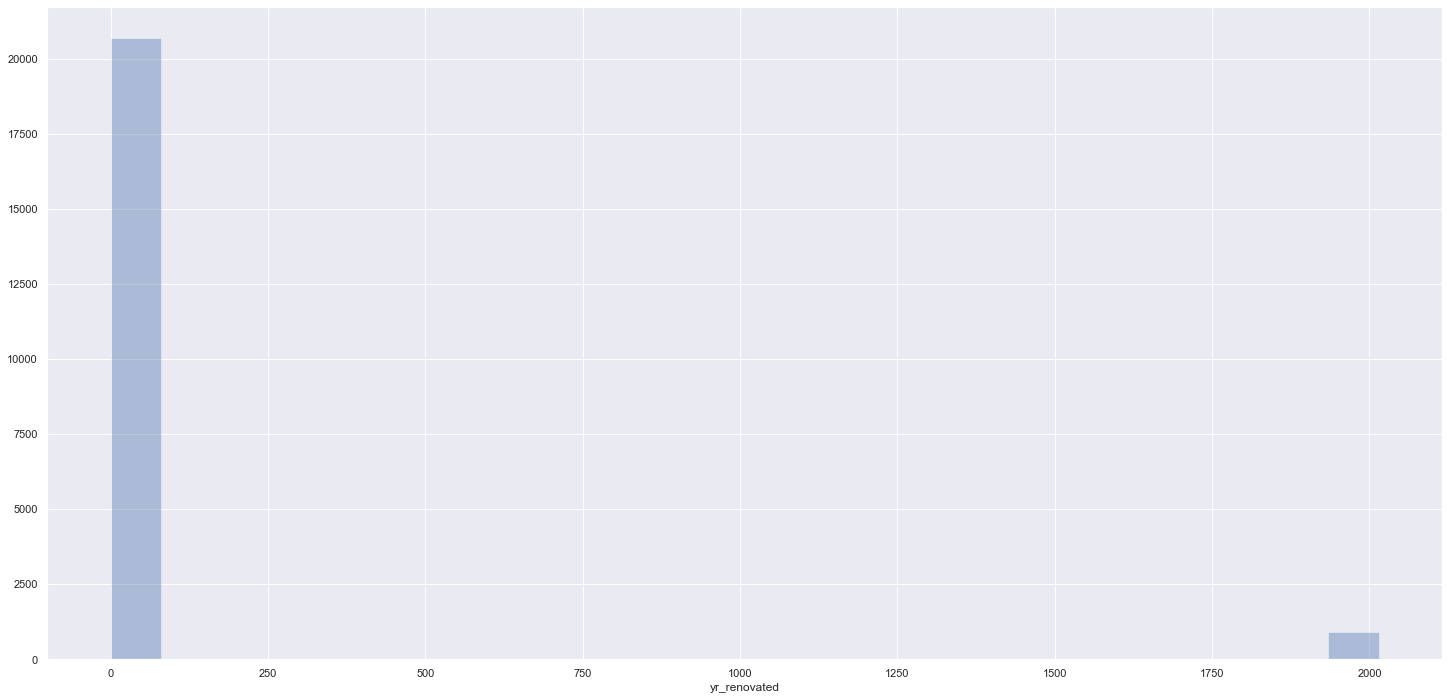

In [28]:
sns.distplot( df3['yr_renovated'], kde=False, bins=25 );

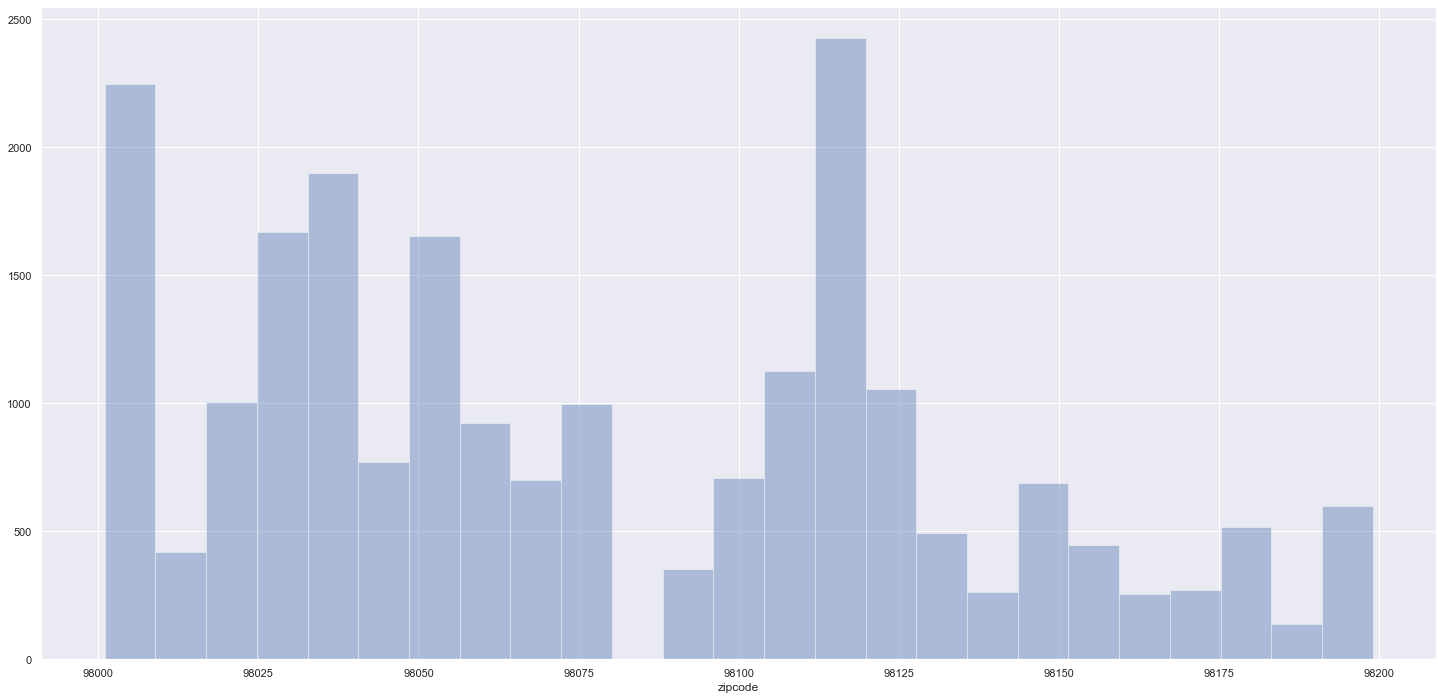

In [29]:
sns.distplot( df3['zipcode'], kde=False, bins=25 );

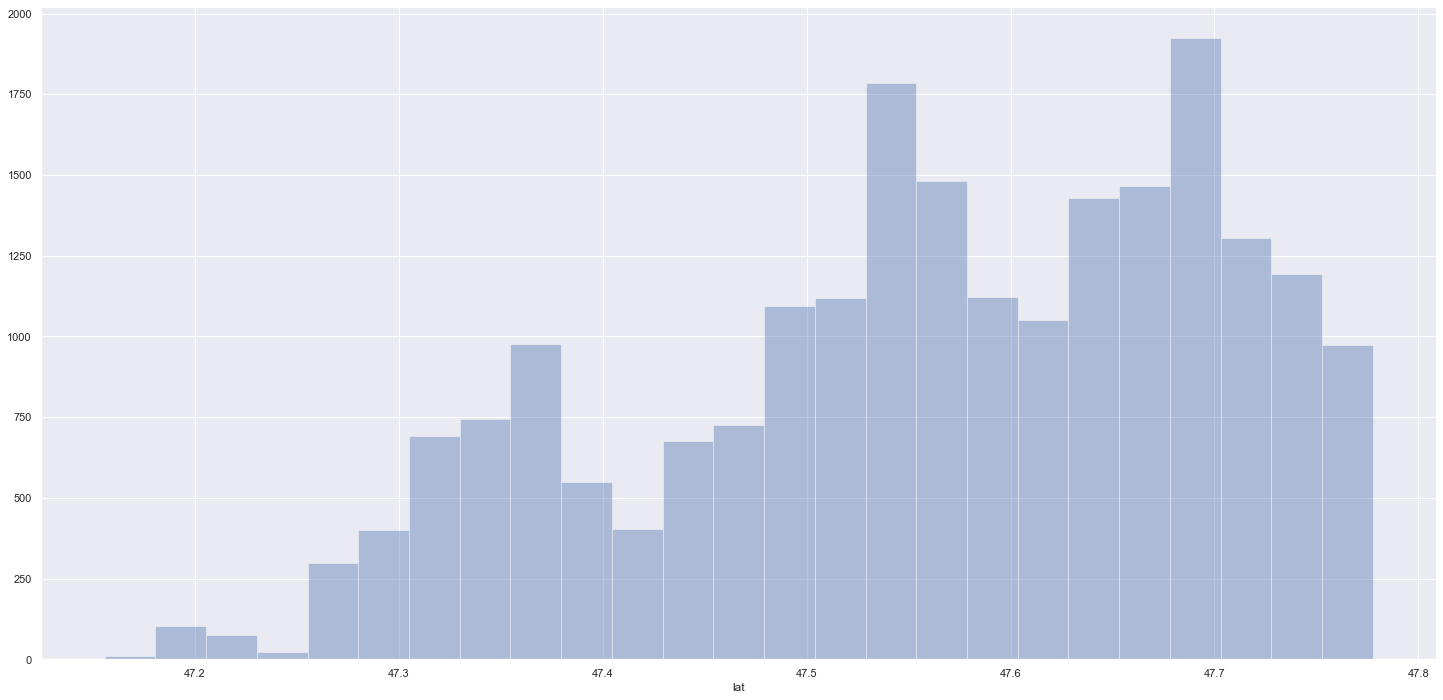

In [30]:
sns.distplot( df3['lat'], kde=False, bins=25 );

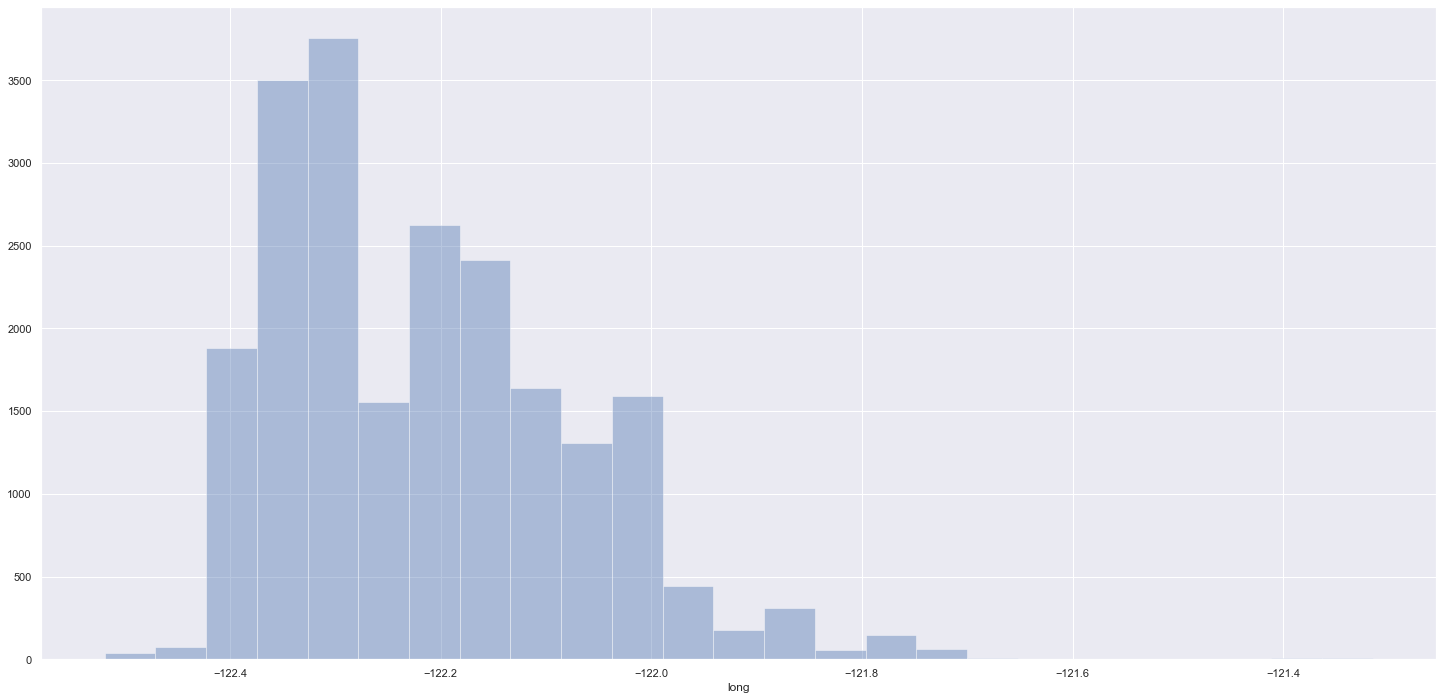

In [31]:
sns.distplot( df3['long'], kde=False, bins=25 );

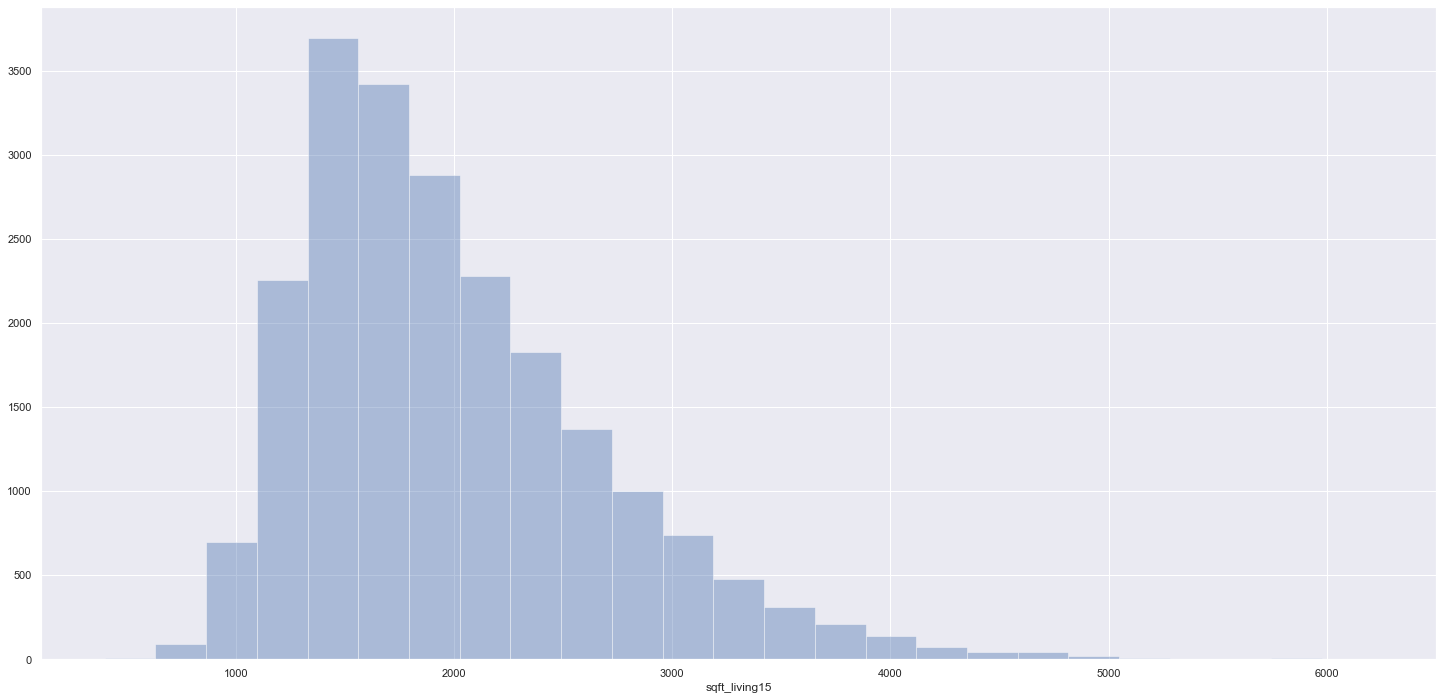

In [32]:
sns.distplot( df3['sqft_living15'], kde=False, bins=25 );

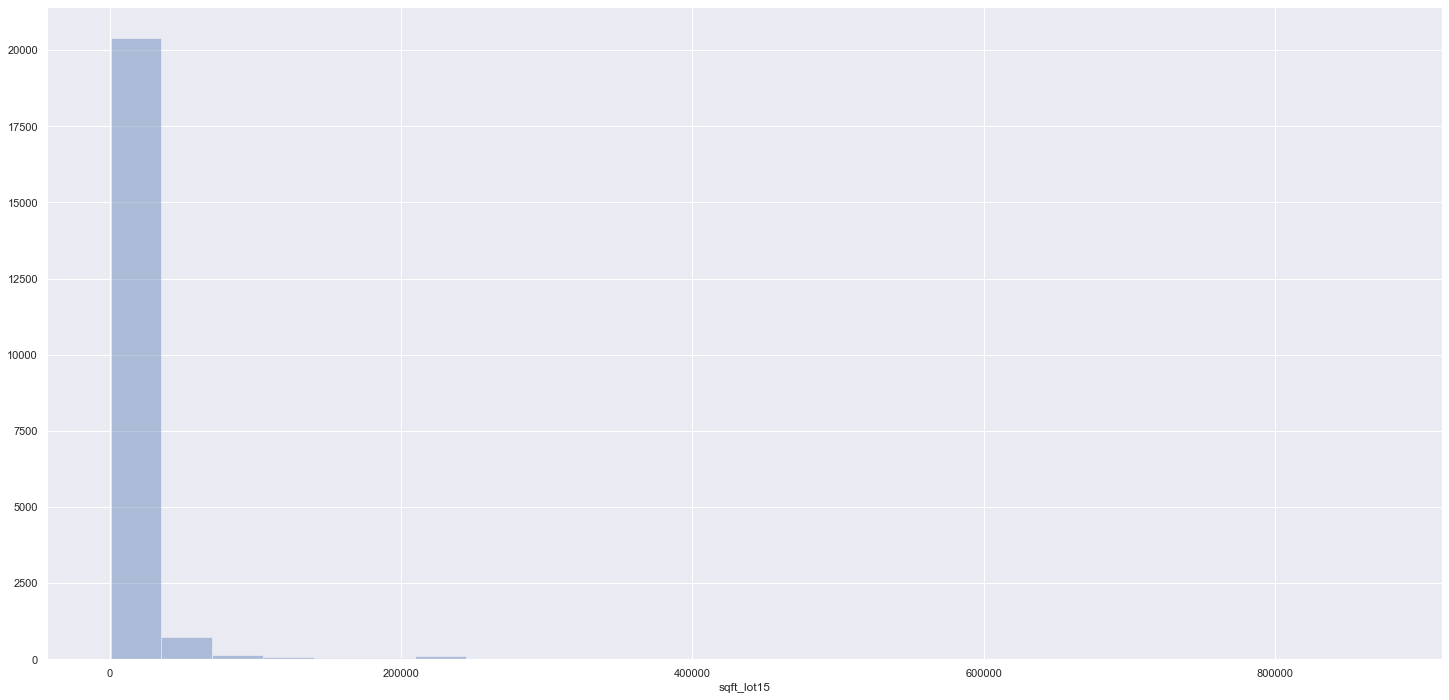

In [77]:
sns.distplot( df3['sqft_lot15'], kde=False, bins=25 );

## 3.2.0. Bivariate Analysis

In [29]:
df3.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.2,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.0,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.0,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.0,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# 3.2.1. Numerical Predictors

### 3.2.1.1. price x bedrooms

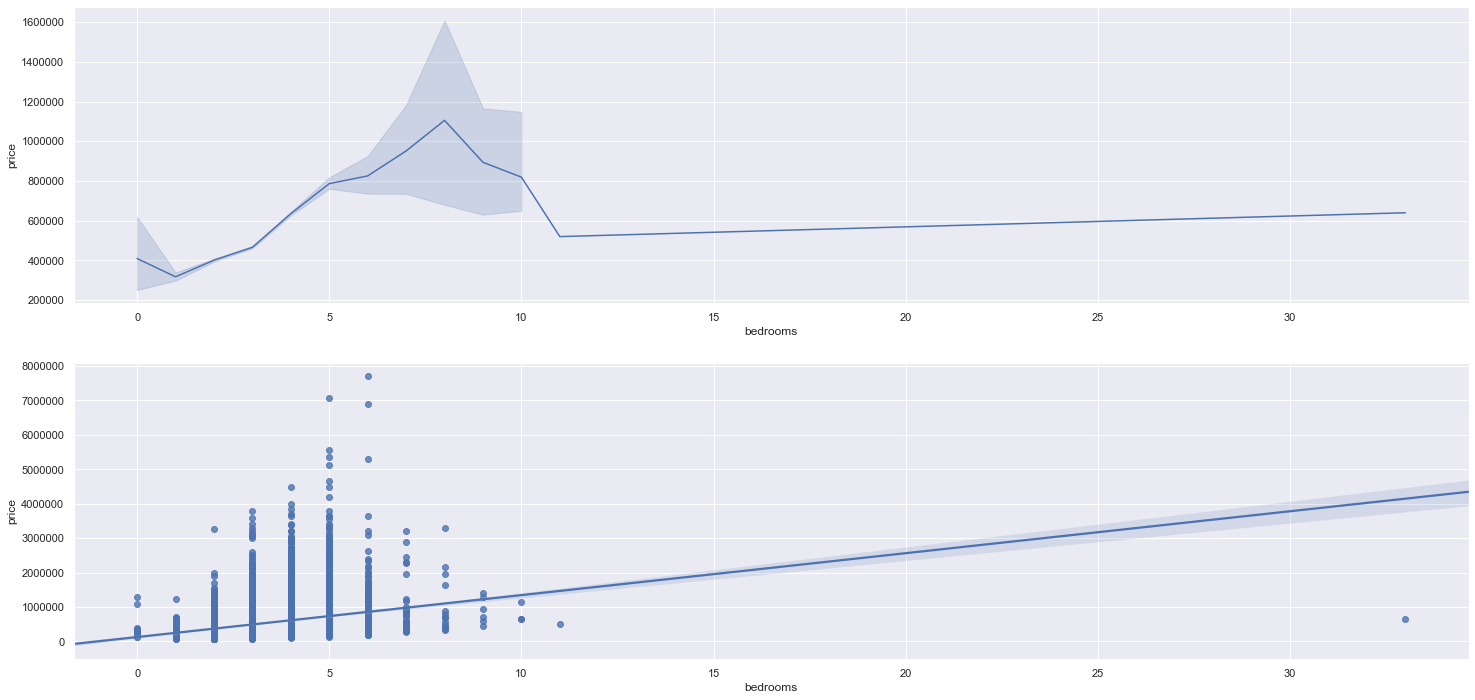

In [31]:
plt.subplot( 2, 1, 1)
sns.lineplot( x='bedrooms', y='price', data=df3 );

plt.subplot( 2, 1, 2 )
sns.regplot( x='bedrooms', y='price', data=df3 );

#Bedrooms Hypothesis 
#Houses with 1+ bedrooms should have cost more because houses with 2+ bedrooms usually cost more than house with only 1 bedroom.
#this Hypothesis is correct, however houses with 8+ bathrooms has decresead and 10+ bathrooms maintain a steady line between $6M to $4m.
#This Graph represents that houses with 2+ bedrooms compared to price, cost is higher and from 5 to 8 bedrooms has a peak price over $1M
#more than around 5 bedrooms reaches a value of  $800k

### 3.2.1.2. price x bathrooms

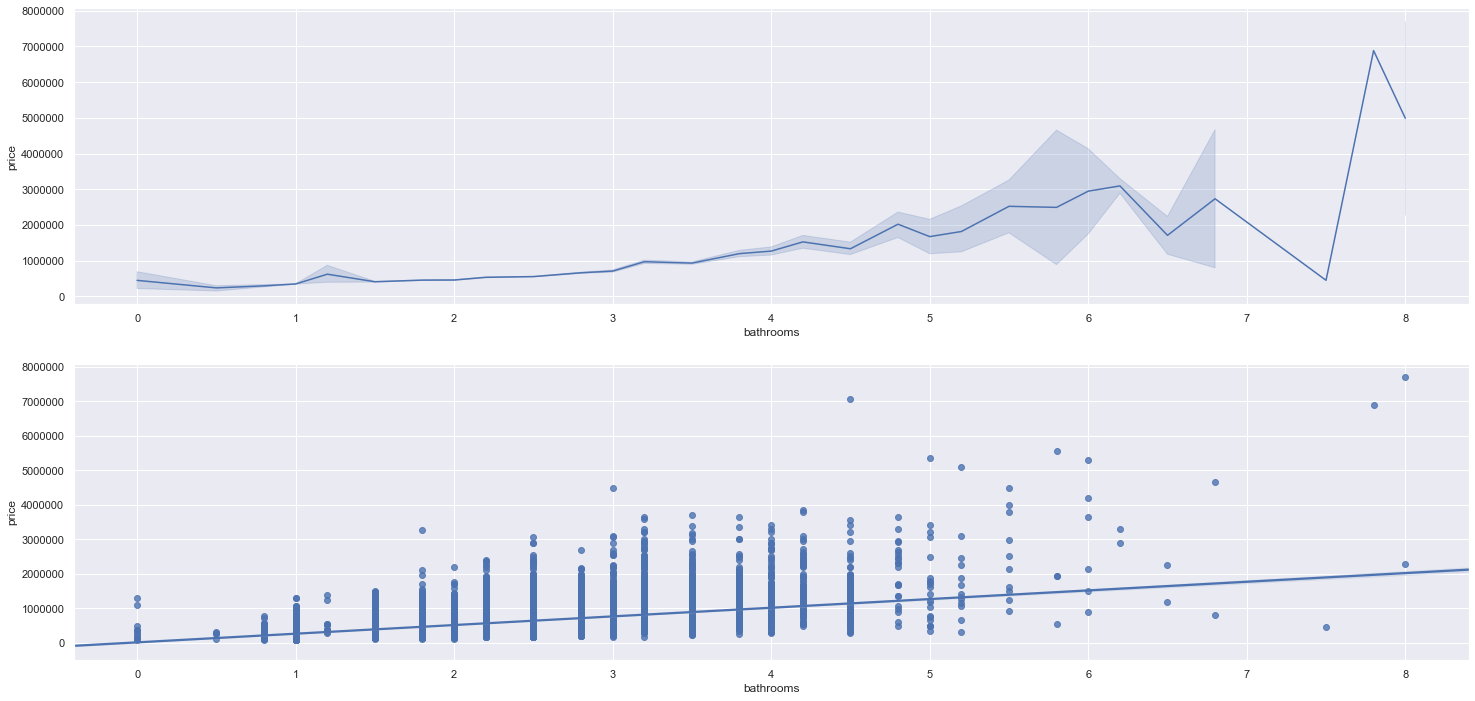

In [32]:
plt.subplot( 2, 1, 1 )
sns.lineplot( x='bathrooms', y='price', data=df3 );

plt.subplot( 2, 1, 2 )
sns.regplot( x='bathrooms', y='price', data=df3);

#Bathrooms Hypothesis
#Houses with 1+ bathrooms should have a higher cost because more bathrooms in a house adds value to it. 
#this hypothesis is correct, however there are a few houses that shows otherwise **investigate**
#This Graph represents that up to 3 bathrooms there is a slightly increase in price 
#4+ bathrooms reaches $1M and more bathrooms vary from $2M to $3M
#There is a case where 7+ bathrooms has a heavy fall in price **important**

### 3.2.1.3. price x sqft_living

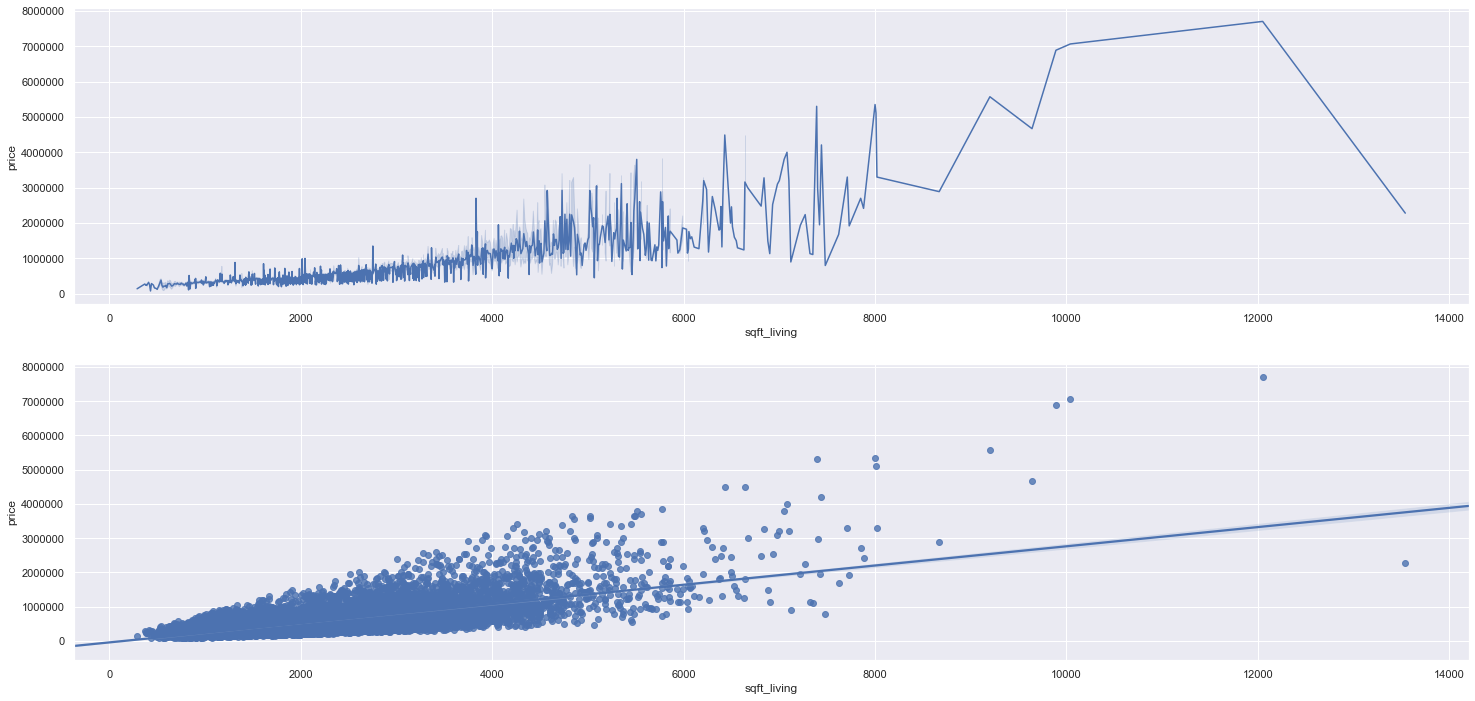

In [29]:
plt.subplot( 2, 1, 1)
sns.lineplot( x='sqft_living', y='price', data=df3 );

plt.subplot( 2, 1, 2 )
sns.regplot( x='sqft_living', y='price', data=df3 );

#sqft_living Hypothesis
#Houses with higher square footage should have cost more because houses with more space adds more value to it.
#this Hypothesis is incorrect, nonetheless some houses which has bigger size in sqft, other houses in the same range has a price fall.
#This Graph represents that there is a great variance among all sizes of square footage area.
#There are several houses from from 4000 to 8000 sqft below $1M and should be taken into consideration 
#One outlier with almost 14000 sqft below $3M 


### 3.2.1.4. price x sqft_lot

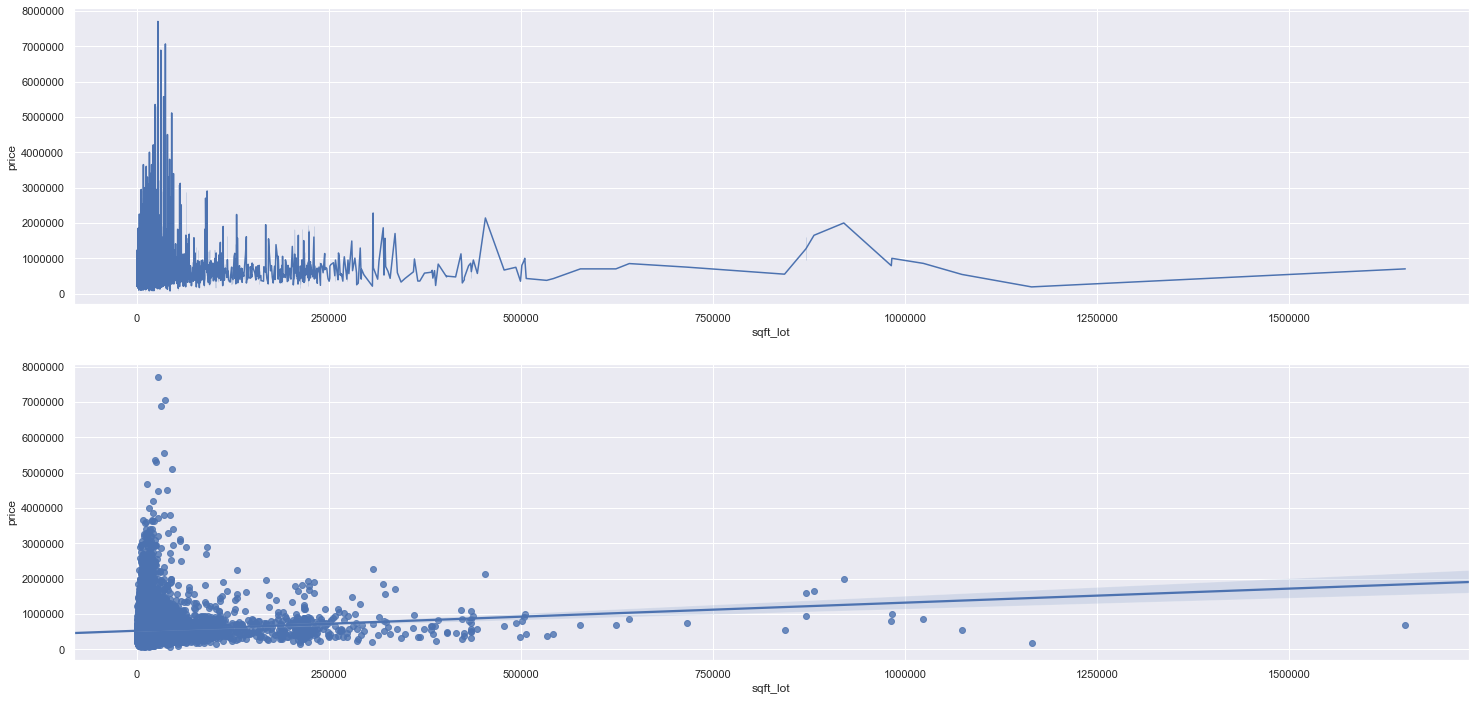

In [30]:
plt.subplot( 2, 1, 1)
sns.lineplot( x='sqft_lot', y='price', data=df3 );

plt.subplot( 2, 1, 2 )
sns.regplot( x='sqft_lot', y='price', data=df3 );

#sqft_lot Hypothesis
#houses with high square footage of the lot should have cost more because the higher the space it adds more value to it.
#This hypothesis is incorrect, houses with less sqft_lot has higher prices 
#This graph represents that a great number of houses with less than 100 000 ft


### 3.2.1.5. price x floors

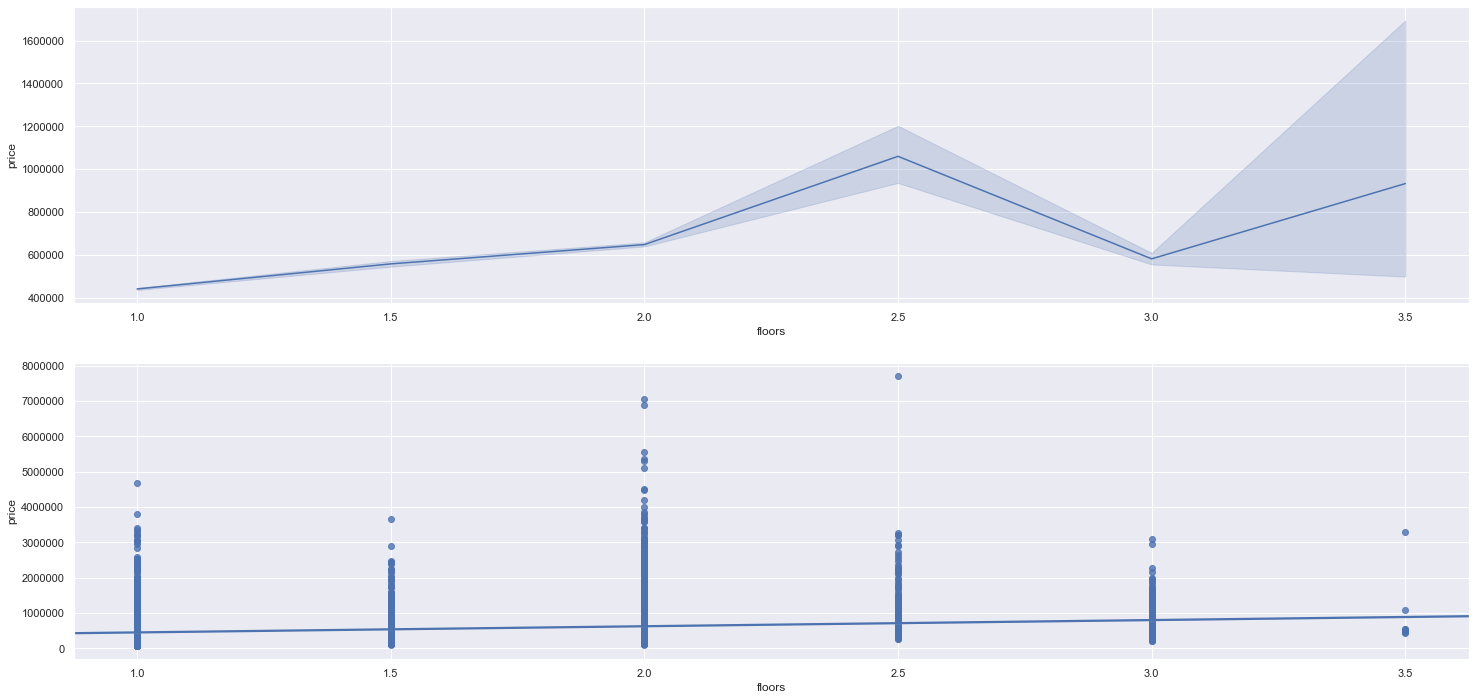

In [38]:
plt.subplot( 2, 1, 1)
sns.lineplot( x='floors', y='price', data=df3 );

plt.subplot( 2, 1, 2 )
sns.regplot( x='floors', y='price', data=df3 );

#Floors hypothesis
#Houses with second floor should have higher cost because another floor adds value to the house.
#this hypothesis is correct, however houses with 3+ floors had their value decreased.
#this graph indicates that houses with 2 floors has higher prices 


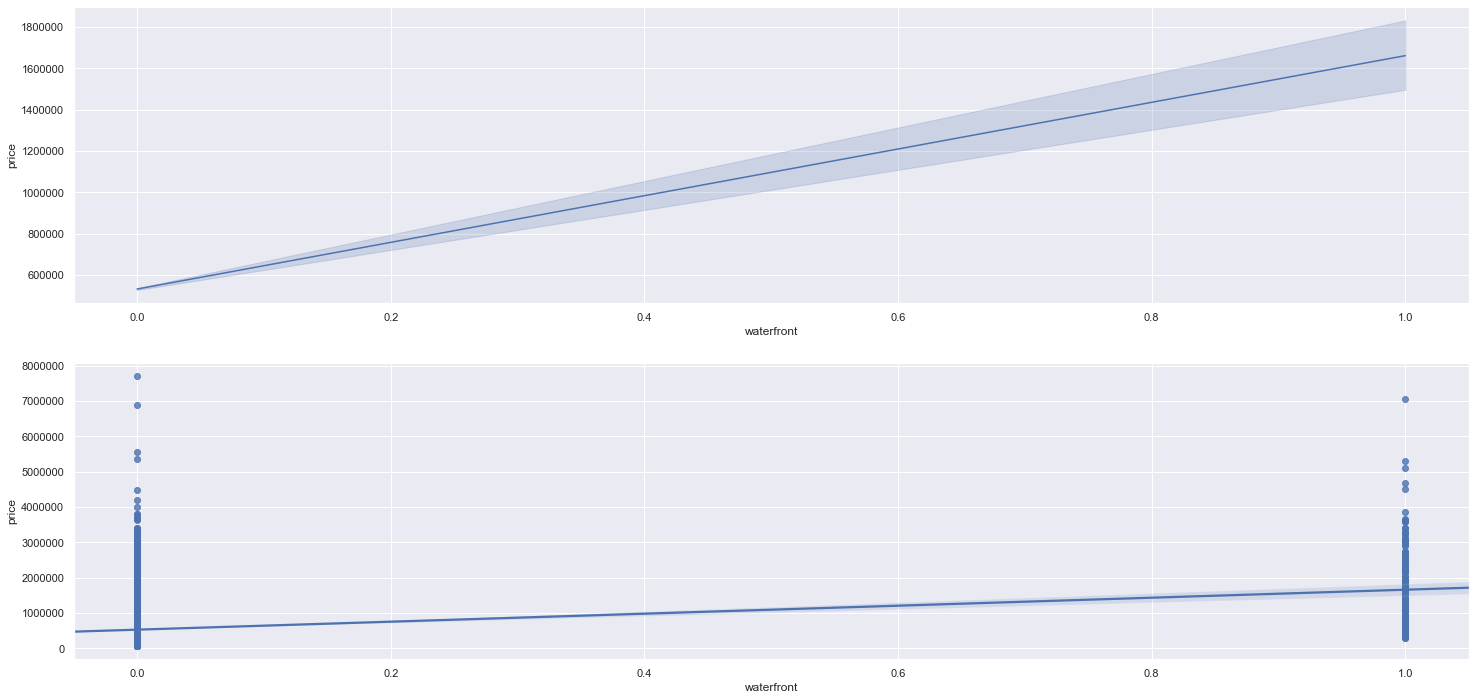

In [41]:
plt.subplot( 2, 1, 1)
sns.lineplot( x='waterfront', y='price', data=df3 );

plt.subplot( 2, 1, 2 )
sns.regplot( x='waterfront', y='price', data=df3 );

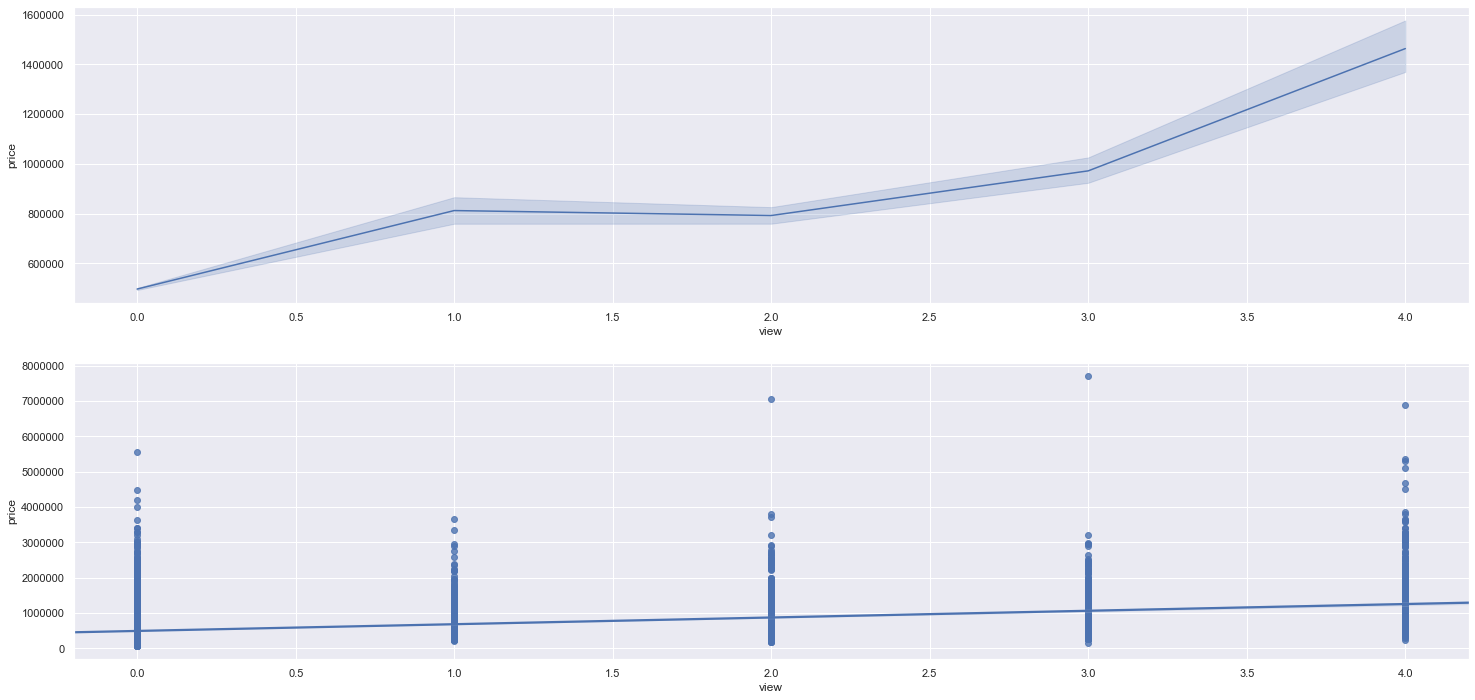

In [42]:
plt.subplot( 2, 1, 1)
sns.lineplot( x='view', y='price', data=df3 );

plt.subplot( 2, 1, 2 )
sns.regplot( x='view', y='price', data=df3 );

#view hypothesis
#Houses with higher number of view should have higher cost because customers consider this option which adds value to it. 
#This hypothesis is correct, view is based from 0 to 4, which 4 is the highest number.
#This graph represents the number of views that keep increasing with along the number graded, 
#note that houses which cost millions is included in this graphic.

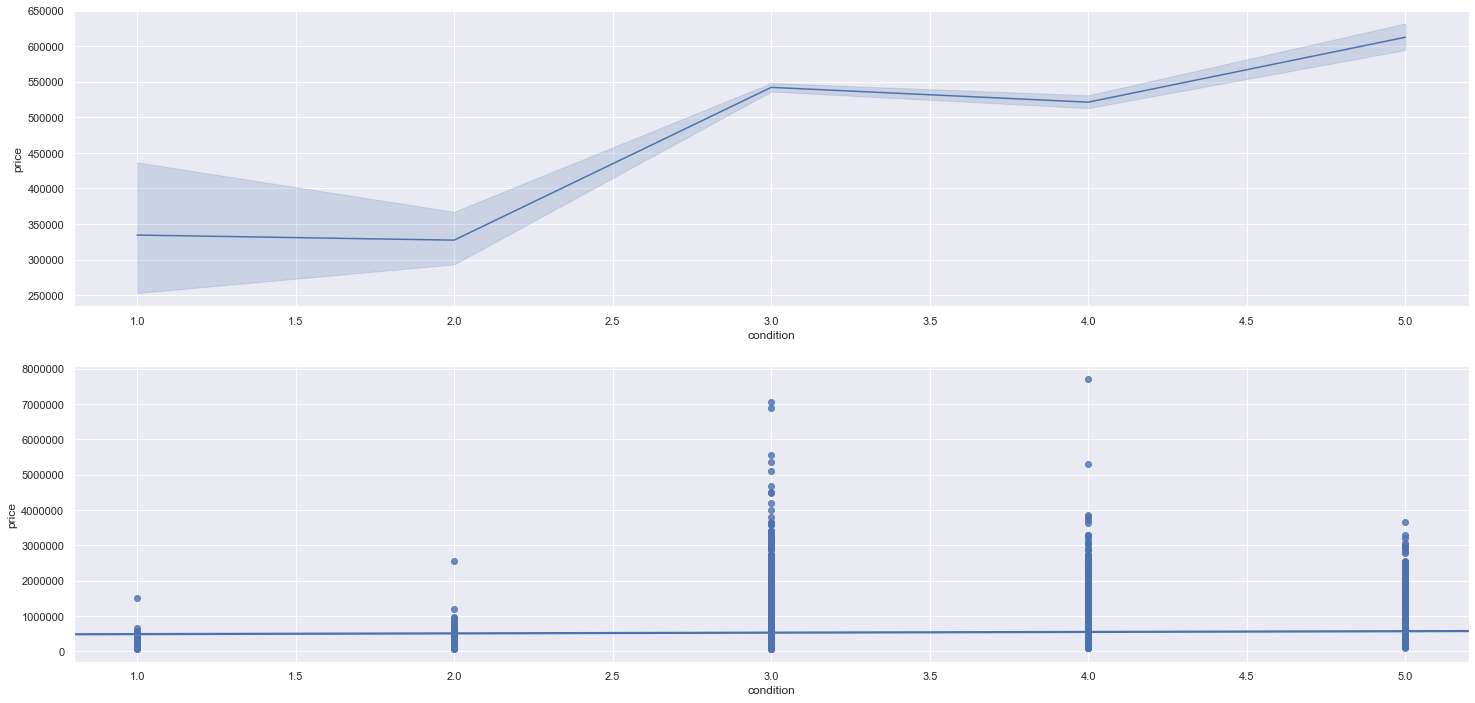

In [43]:
plt.subplot( 2, 1, 1)
sns.lineplot( x='condition', y='price', data=df3 );

plt.subplot( 2, 1, 2 )
sns.regplot( x='condition', y='price', data=df3 );

#conditions hypothesis
#Houses with high conditions should have cost more than house with low condition 
#because the better the condition higher should be the price and the lower the condition should be cheaper
#This hypothesis is correct, even though most of the houses has condition nr 3 compared to nr 4 and 5
#some of these houses actually are in the same range of price or even cost less.



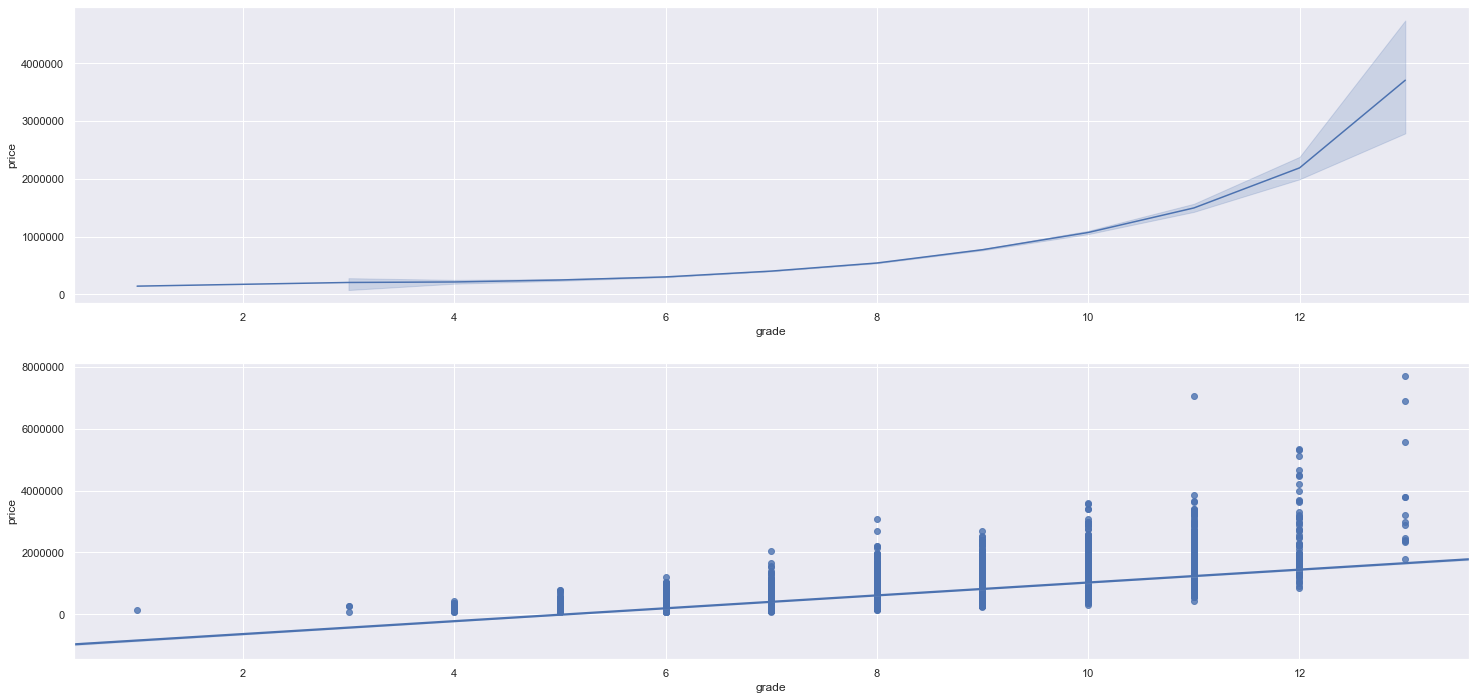

In [44]:
plt.subplot( 2, 1, 1)
sns.lineplot( x='grade', y='price', data=df3 );

plt.subplot( 2, 1, 2 )
sns.regplot( x='grade', y='price', data=df3 );

#Grade hypothesis
#Houses that have been graded higher should have cost more because of the overall experience of the customer in the house.
#this hypothesis is correct, higher the grade price follows.
#This graph represent the increasing number of price based on the grade of a house, several houses that cost less than $2M
#has been graded up to 13 and it is likely to affect the price.

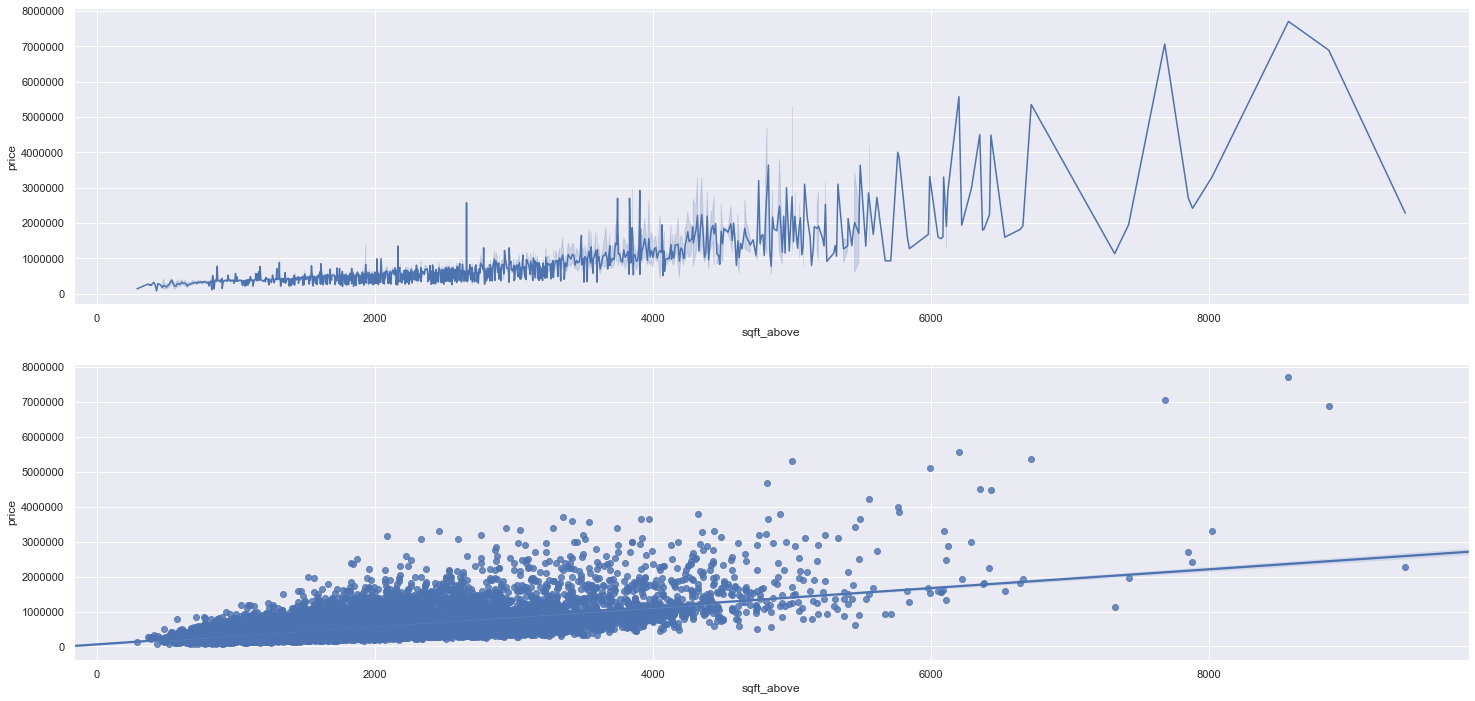

In [45]:
plt.subplot( 2, 1, 1)
sns.lineplot( x='sqft_above', y='price', data=df3 );

plt.subplot( 2, 1, 2 )
sns.regplot( x='sqft_above', y='price', data=df3 );



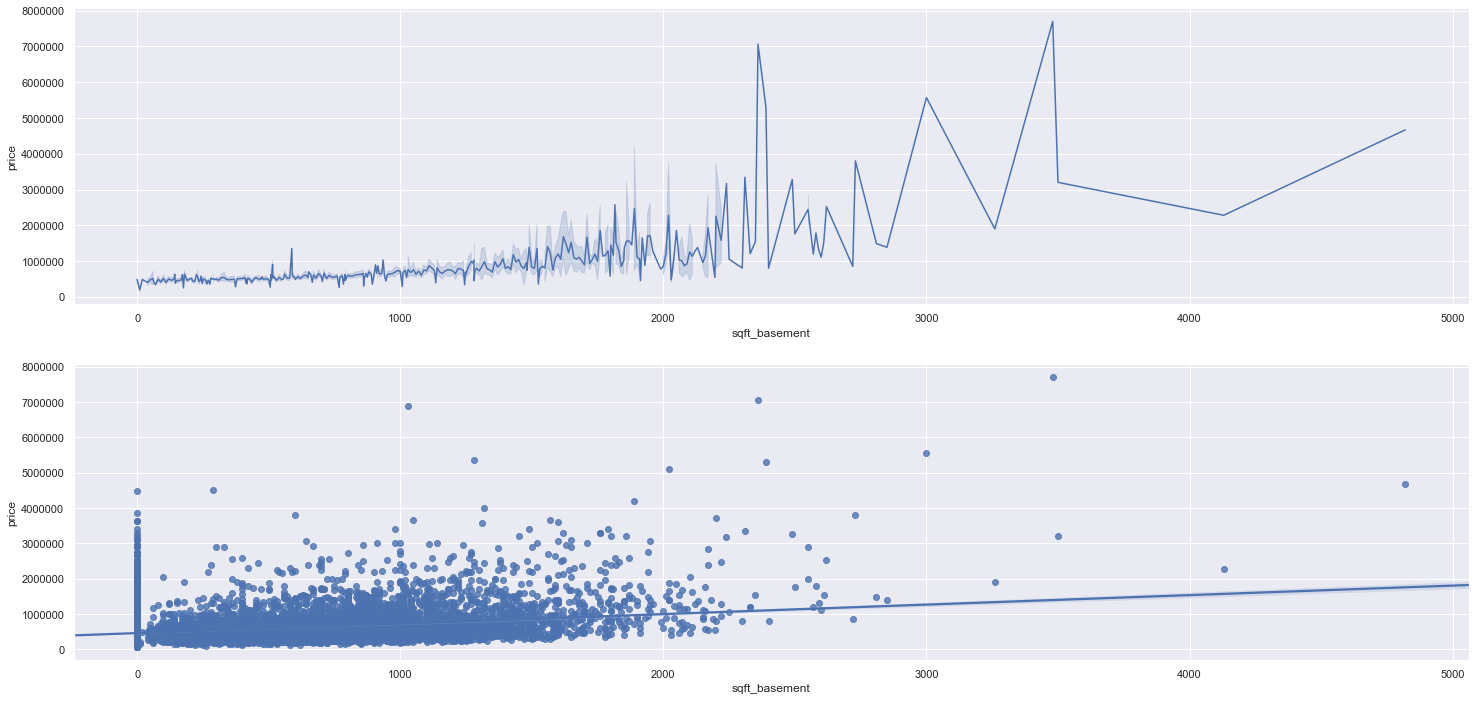

In [46]:
plt.subplot( 2, 1, 1)
sns.lineplot( x='sqft_basement', y='price', data=df3 );

plt.subplot( 2, 1, 2 )
sns.regplot( x='sqft_basement', y='price', data=df3 );

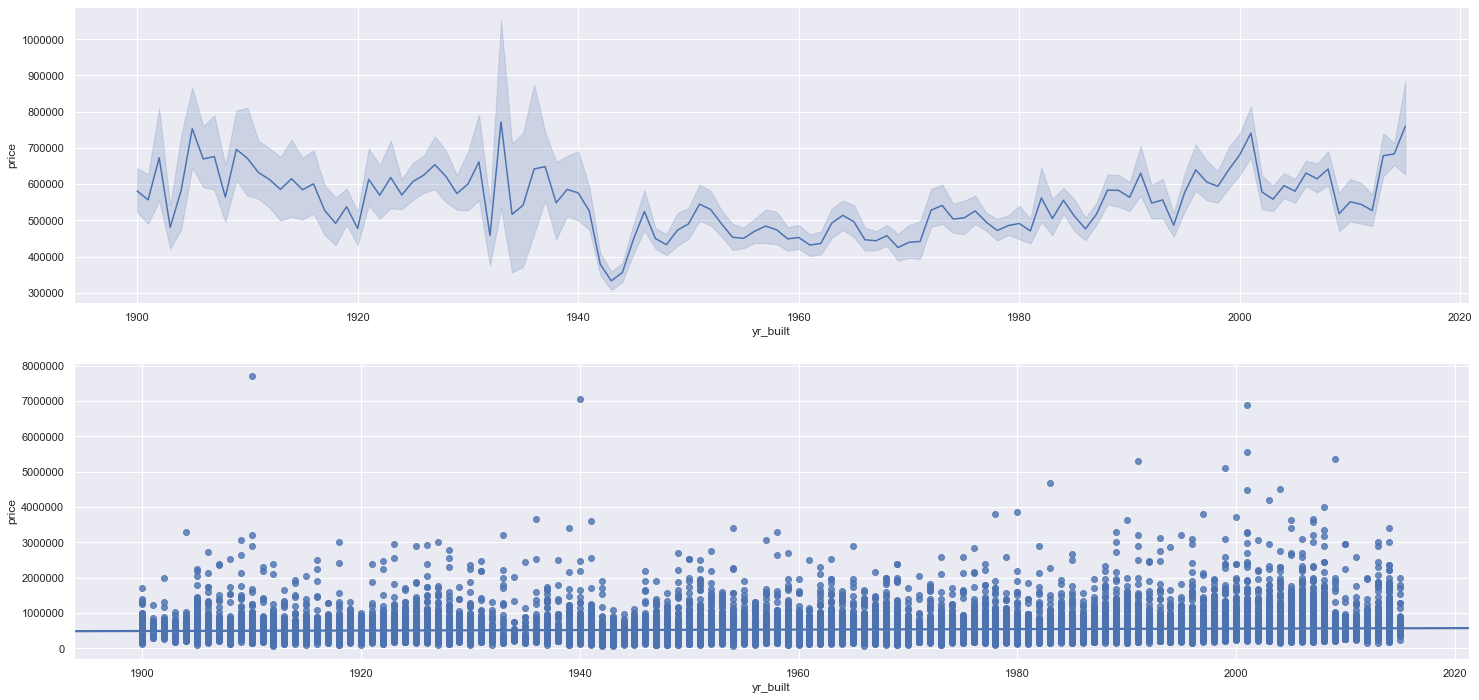

In [47]:
plt.subplot( 2, 1, 1)
sns.lineplot( x='yr_built', y='price', data=df3 );

plt.subplot( 2, 1, 2 )
sns.regplot( x='yr_built', y='price', data=df3 );

#yr_built hypothesis
# Houses that have been built with more than 50 year old should cost less because it is old and needs renovation.
#This hypotheis is incorrect, graphic shows that some houses built from 1920 to 1940
#has higher prices than other built in 2000 onwards.
#This graphic represents houses built from 1900 to 2020, and indicates cost of newer houses is not a determining factor compared to price.

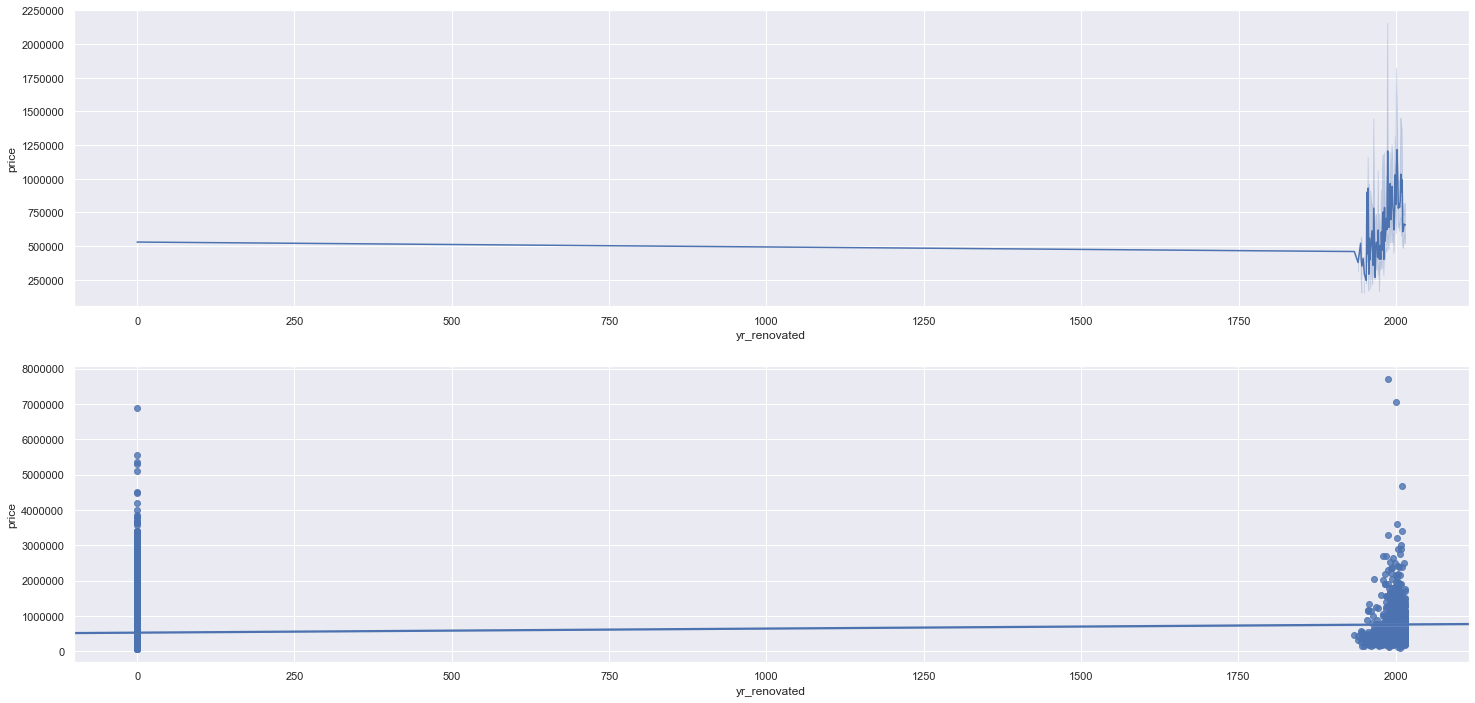

In [48]:
plt.subplot( 2, 1, 1)
sns.lineplot( x='yr_renovated', y='price', data=df3 );

plt.subplot( 2, 1, 2 )
sns.regplot( x='yr_renovated', y='price', data=df3 );

#yr_renovated hypothesis
#Houses with renovation should cost more because this enhancement should add value to the house.
#This hypothesis is correct, houses renovated near 2000 has increased in value.
#This graphic shows that houses renovated towards and of 1990 and beginning of 2000 onwards has increased the value.

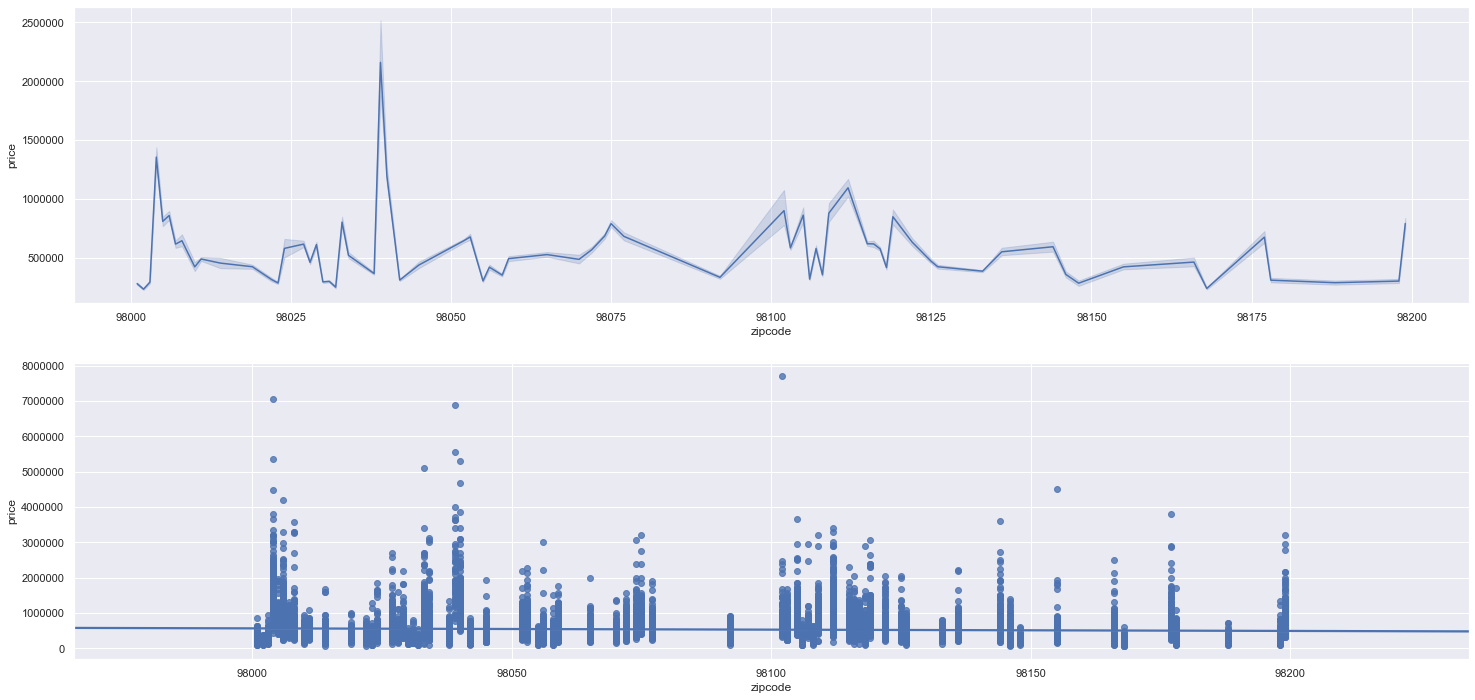

In [49]:
plt.subplot( 2, 1, 1)
sns.lineplot( x='zipcode', y='price', data=df3 );

plt.subplot( 2, 1, 2 )
sns.regplot( x='zipcode', y='price', data=df3 );

#zipcode hypothesis
#Houses located in rich zipcodes should have cost more because rich neighbourhoods increases the value of a house.
#This graphs represents prices compared to zipcodes, suburbs such as Bellevue, Bridle Trails, Bel-Red, Woodridge 
#is an example of wealth zipcodes 
#Other wealth zipcodes, Kirkland, Yarrow Point, South Juanita, Highlands, South Rose Hill, Willow-Rose Hill, Moss Bay, Central Houghton
#All these zipcodes are likely to increase the house value because of its average income.



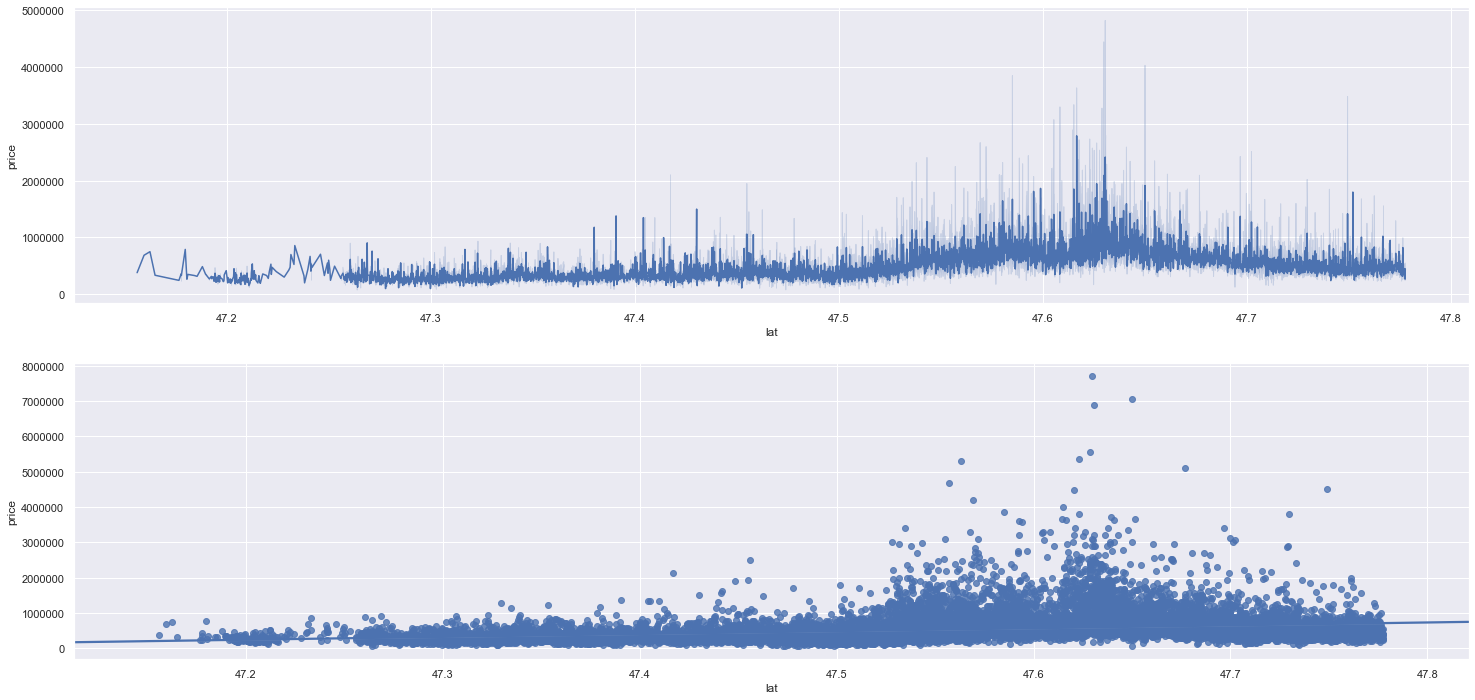

In [50]:
plt.subplot( 2, 1, 1)
sns.lineplot( x='lat', y='price', data=df3 );

plt.subplot( 2, 1, 2 )
sns.regplot( x='lat', y='price', data=df3 );

#Lat hypothesis
#Houses with lat in rich or strategic areas should have cost more because houses with good location adds more value.
#This hypothesis is correct, the center of seattle lat is 47.6 and its surrounds which is closer to the cbd and lake washington 
#this graphics represent the latittude location compared to prices, and houses location between lat 47.6 to 47.7 accomodates a high nuumber of houses 
#with high prices.



In [ ]:
plt.subplot( 2, 1, 1)
sns.lineplot( x='long', y='price', data=df3 );

plt.subplot( 2, 1, 2 )
sns.regplot( x='long', y='price', data=df3 );

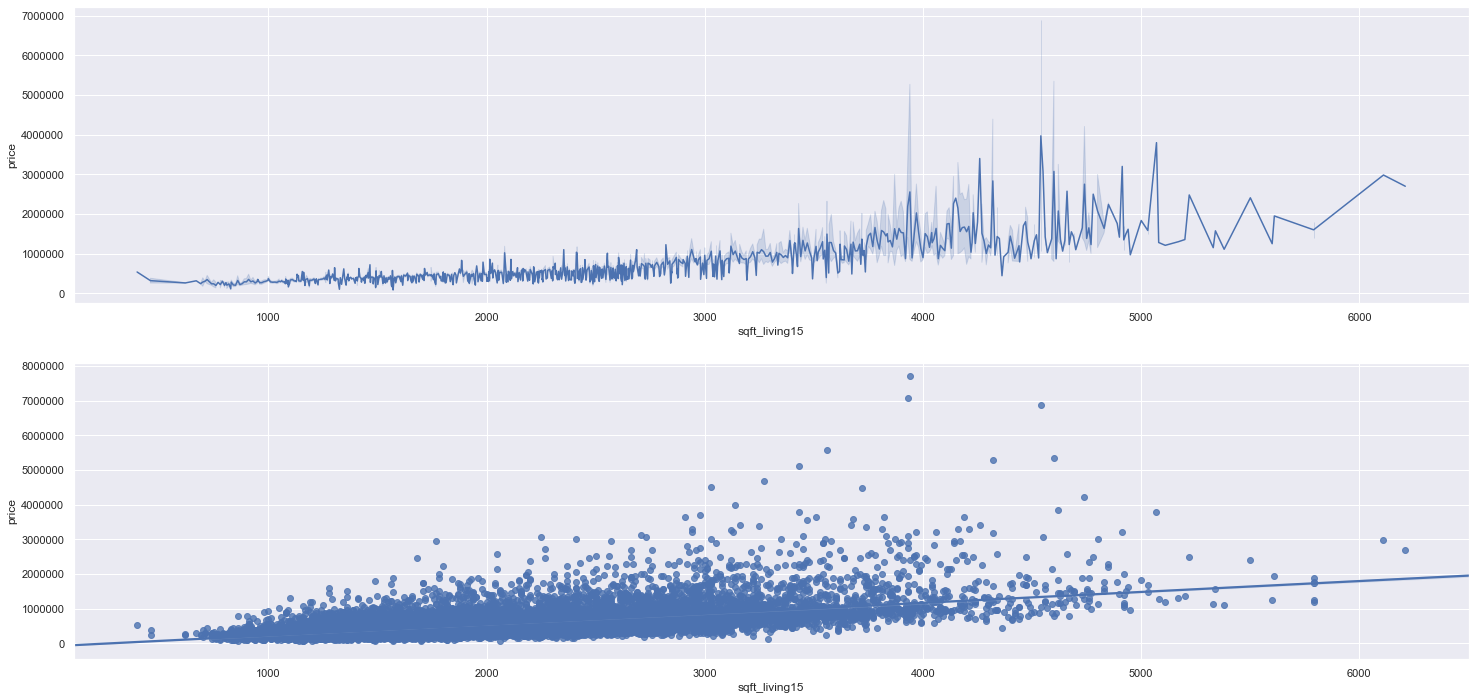

In [40]:
plt.subplot( 2, 1, 1)
sns.lineplot( x='sqft_living15', y='price', data=df3 );

plt.subplot( 2, 1, 2 )
sns.regplot( x='sqft_living15', y='price', data=df3 );

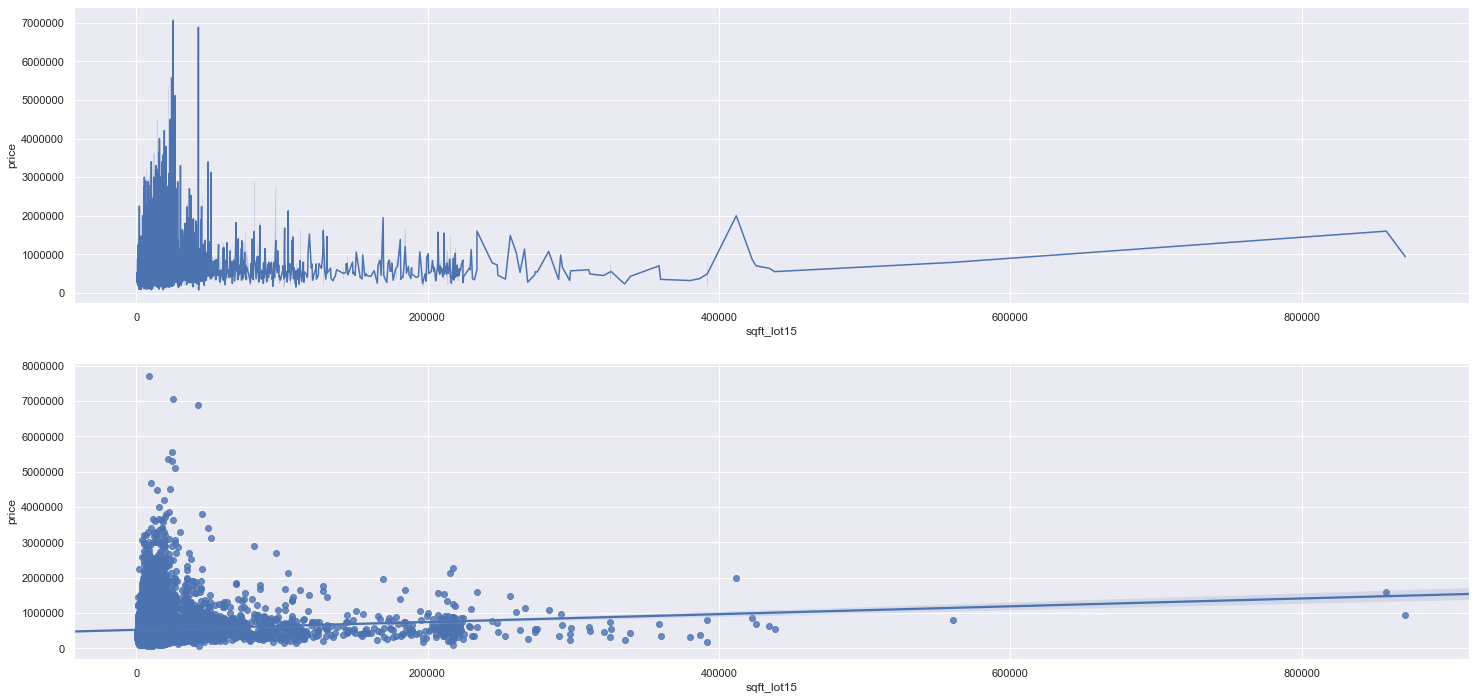

In [51]:
plt.subplot( 2, 1, 1)
sns.lineplot( x='sqft_lot15', y='price', data=df3 );

plt.subplot( 2, 1, 2 )
sns.regplot( x='sqft_lot15', y='price', data=df3 );

# 3.3. Multivariate Analysis

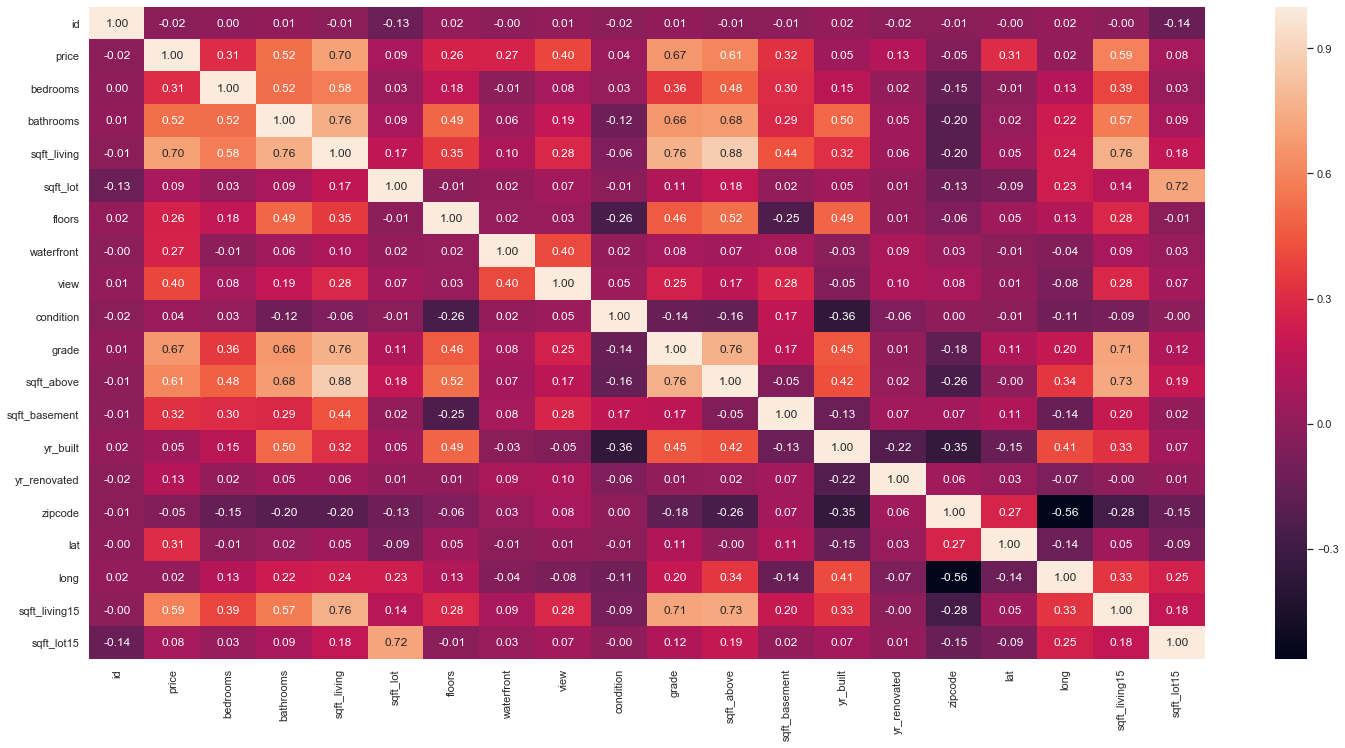

In [23]:
corr = num_attributes.corr()
sns.heatmap( corr, annot=True, fmt=".2f" )

plt.show()

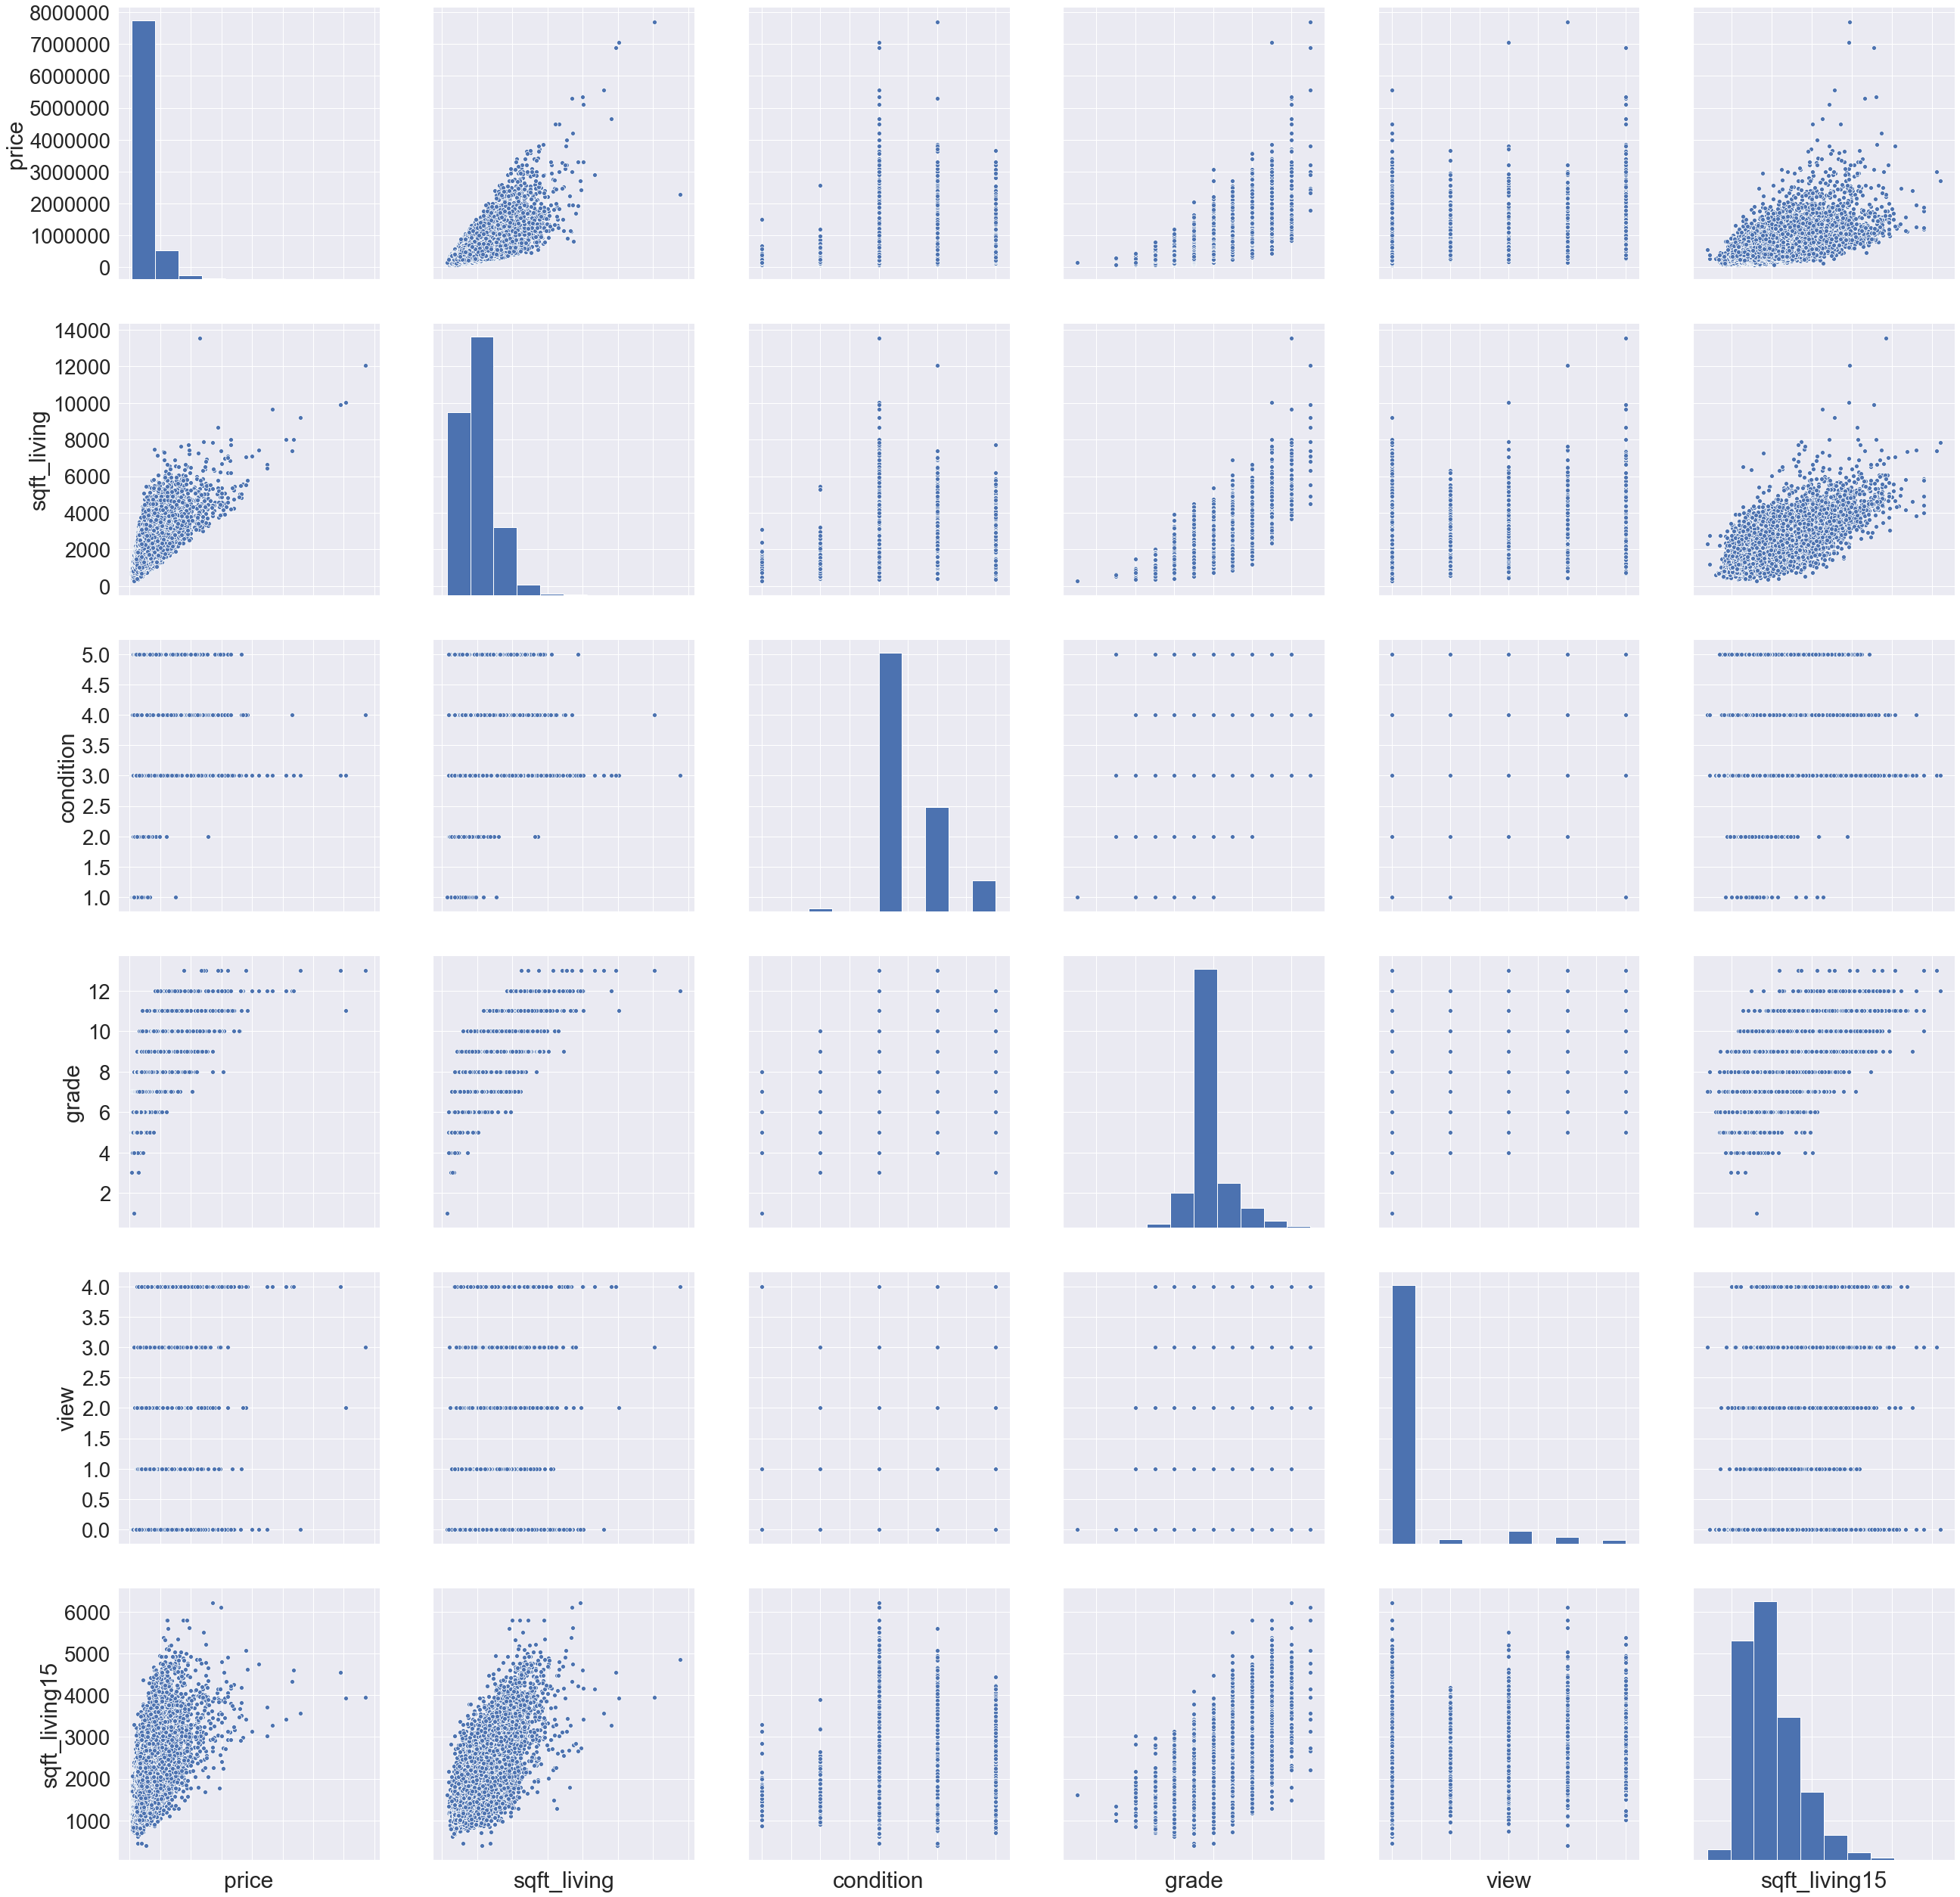

In [25]:
with sns.plotting_context("notebook", font_scale=2.5):
    pair = sns.pairplot(df3[[ 'price', 'sqft_living', 'condition', 'grade', 'view', 'view' ]],
                       palette='tab20', size=6)

pair.set(xticklabels=[]);

#I choose some variables that has high correlation with price to pairplot comparation